# Analysing Airbnb Listings

Airbnb has been the go-to application for tourists in the past few years. Within the last 11 years, it has grown meterolically and has grown from nothing to a 30 billion dollar firm (whew!). Eleven years on, Airbnb’s site lists more than six million rooms, flats and houses in more than 81,000 cities across the globe. On average, two million people rest their heads in an Airbnb property each night – half a billion since 2008. Last year, Forbes estimated the business to be worth 31 billion dollars (double whew!). 

Naturally, with any multibillion dollar organization, exploring the inner workings and trends of their data would prove to be an exciting task. Especially with an organization that has uprooted the hotel business out from its very roots and challenged traditional thinking when it comes to housing and accomodation. 

Obviously Airbnb doesn't provide us with open data or databases that we can work with but luckily, I found http://insideairbnb.com/ which provides us with public information compiled from the Airbnb web-site and analyzes publicly available information about a city's Airbnb's listings. Coincidentally, it also gives us very convenient filters to work with which made my Exploratory Data Analysis that much easier to work with. 

I chose to work with the Toronto Airbnb data and perform EDA and run a few models on it. With the popularity of Airbnb growing by leaps and bounds (along with a few hiccups on the way), it seemed only natural to work on the data to glean more insights on it. 

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from mpl_toolkits.basemap import Basemap
plt.style.use('fivethirtyeight')

In [83]:
data = pd.read_csv(r'C:\Users\krish\Desktop\ADS\listings.csv\listings.csv')

C:\Users\krish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Inspecting the Dataset

In [84]:
data.shape

(23397, 106)

Seems like a picked a hefty dataset with more than 23,000 rows and more than a 100 columns. 

In [85]:
data.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20191207213017,2019-12-08,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.13
1,8077,https://www.airbnb.com/rooms/8077,20191207213017,2019-12-08,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,none,NaN,...,t,f,strict_14_with_grace_period,f,t,2,1,1,0,1.35
2,12604,https://www.airbnb.com/rooms/12604,20191207213017,2019-12-08,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlour.,Family of 4 (2 kids) plus a friendly dog open...,Comfortable sofa bed in airy main floor parlou...,none,NaN,...,f,f,moderate,f,f,1,0,1,0,NaN
3,23691,https://www.airbnb.com/rooms/23691,20191207213017,2019-12-08,Queen Bedroom close to downtown,NaN,Nestled in the middle of a quiet residential n...,Nestled in the middle of a quiet residential n...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,1.85
4,26654,https://www.airbnb.com/rooms/26654,20191207213017,2019-12-08,World Class downtown @CN Tower Theatre MTCC ga...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",Welcome to 5***** Living - Bohemian decor~ in ...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",none,There's a reason they call it the Entertainmen...,...,f,f,strict_14_with_grace_period,f,f,7,7,0,0,0.35


In [86]:
data.tail(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
23392,40647107,https://www.airbnb.com/rooms/40647107,20191207213017,2019-12-08,Anna小屋,NaN,NaN,NaN,none,NaN,...,f,f,moderate,f,f,1,0,0,1,NaN
23393,40647659,https://www.airbnb.com/rooms/40647659,20191207213017,2019-12-08,Artsy Bed & Private Bathroom in Downtown,Charming and eclectic new condo in downtown To...,"It's an artsy, nerdy space! Much of the art is...",Charming and eclectic new condo in downtown To...,none,"At the turn of the century, Corktown was home ...",...,f,f,moderate,f,f,1,0,1,0,NaN
23394,40650244,https://www.airbnb.com/rooms/40650244,20191207213017,2019-12-08,4 LOFTS- 6000 SQ FT-2-15 Bedrooms + Party Room,"Newly renovated, 4 large loft style apartments...",4 Apartments: units (Phone number hidden by Ai...,"Newly renovated, 4 large loft style apartments...",none,Located in funky china town. Lots of very affo...,...,t,f,strict_14_with_grace_period,f,f,22,22,0,0,NaN
23395,40650884,https://www.airbnb.com/rooms/40650884,20191207213017,2019-12-08,4 Bed/8 ppl Lux Suite⭐CN Tower View⭐FREE Parking,"I'd love to host you in my spacious, cozy cond...",Master Bedroom: Features a super comfortable b...,"I'd love to host you in my spacious, cozy cond...",none,"Close to all popular restaurants, city attract...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN
23396,40651493,https://www.airbnb.com/rooms/40651493,20191207213017,2019-12-08,Spacious Room 3-Min Walk to Subway (Female Only),We live in a clean and spacious townhouse just...,Our townhouse has three floors with two kitche...,We live in a clean and spacious townhouse just...,none,We live in a quiet and friendly neighbourhood ...,...,f,f,strict_14_with_grace_period,f,f,4,0,4,0,NaN


In [87]:
data.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.339700e+04,2.339700e+04,0.0,0.0,0.0,2.339700e+04,0.0,23112.000000,23112.000000,0.0,...,18708.000000,18711.000000,18704.00000,18706.000000,4.000000e+00,23397.000000,23397.000000,23397.000000,23397.000000,19007.000000
mean,2.496000e+07,2.019121e+13,NaN,NaN,NaN,1.005188e+08,NaN,6.142177,6.142177,NaN,...,9.720761,9.741329,9.71728,9.439645,5.492795e+08,5.082489,3.209300,1.598624,0.221225,1.924827
std,1.141682e+07,6.675924e+00,NaN,NaN,NaN,9.436754e+07,NaN,16.446520,16.446520,NaN,...,0.730157,0.729028,0.64864,0.891204,3.454488e+08,12.007540,10.647181,4.348225,2.630286,2.177279
min,1.419000e+03,2.019121e+13,NaN,NaN,NaN,1.565000e+03,NaN,0.000000,0.000000,NaN,...,2.000000,2.000000,2.00000,2.000000,2.501121e+08,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.620367e+07,2.019121e+13,NaN,NaN,NaN,2.008415e+07,NaN,1.000000,1.000000,NaN,...,10.000000,10.000000,10.00000,9.000000,2.501121e+08,1.000000,0.000000,0.000000,0.000000,0.360000
50%,2.652565e+07,2.019121e+13,NaN,NaN,NaN,6.389988e+07,NaN,2.000000,2.000000,NaN,...,10.000000,10.000000,10.00000,10.000000,5.492795e+08,1.000000,1.000000,0.000000,0.000000,1.060000
75%,3.528959e+07,2.019121e+13,NaN,NaN,NaN,1.706335e+08,NaN,4.000000,4.000000,NaN,...,10.000000,10.000000,10.00000,10.000000,8.484470e+08,4.000000,2.000000,1.000000,0.000000,2.790000
max,4.065149e+07,2.019121e+13,NaN,NaN,NaN,3.151152e+08,NaN,328.000000,328.000000,NaN,...,10.000000,10.000000,10.00000,10.000000,8.484470e+08,121.000000,113.000000,43.000000,52.000000,19.460000


In [88]:
data.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                1
summary                                           970
space                                            6512
description                                       630
experiences_offered                                 0
neighborhood_overview                            8079
notes                                           12840
transit                                          7981
access                                          10016
interaction                                      8754
house_rules                                      7669
thumbnail_url                                   23397
medium_url                                      23397
picture_url                                         0
xl_picture_url              

We can see a ton of null values in very many columns, however after cleaning it all, we should get to see a lot less null values

In [89]:
data.nunique()

id                                              23397
listing_url                                     23397
scrape_id                                           1
last_scraped                                        2
name                                            22976
summary                                         20689
space                                           15349
description                                     21851
experiences_offered                                 1
neighborhood_overview                           12705
notes                                            8643
transit                                         12841
access                                          11294
interaction                                     11722
house_rules                                     13040
thumbnail_url                                       0
medium_url                                          0
picture_url                                     22903
xl_picture_url              

## Cleaning the Dataset

#### There are many columns that have no purpose with either our EDA or with our predictive models so it only makes sense to drop the useless columns

In [90]:
data.drop(columns = ['listing_url','scrape_id','last_scraped','name','summary','space','description','experiences_offered','neighborhood_overview','notes','transit','access','interaction','house_rules','thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_name','host_since','host_location','host_about','host_response_rate','host_acceptance_rate','host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count','host_verifications','host_has_profile_pic','host_identity_verified','street','neighbourhood_cleansed','neighbourhood_group_cleansed','city','state','market','smart_location','country_code','country','is_location_exact','amenities','square_feet','weekly_price','monthly_price','security_deposit','cleaning_fee','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','availability_30','availability_60','availability_90','calendar_last_scraped','number_of_reviews_ltm','first_review','last_review','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','requires_license','license','jurisdiction_names','is_business_travel_ready','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','has_availability','zipcode','extra_people'],inplace=True)

In [91]:
data.shape

(23397, 24)

Now we see that after dropping the extra columns, our dataset turns out at a more manageable and interpretable 24 columns. It should be much easier to clean the data now. 

In [92]:
data.dtypes

id                             int64
host_id                        int64
host_response_time            object
host_is_superhost             object
host_total_listings_count    float64
neighbourhood                 object
latitude                     float64
longitude                    float64
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
bed_type                      object
price                         object
guests_included                int64
minimum_nights                 int64
maximum_nights                 int64
availability_365               int64
number_of_reviews              int64
review_scores_rating         float64
instant_bookable              object
reviews_per_month            float64
dtype: object

First and foremost, we see that the columns of prices is of the object type. The below code will remove the unwanted characters from the column and convert the datatype of the column to float.

In [93]:
data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].str.replace(',', '')

data['price'] = data['price'].astype(float)

In [94]:
data.dtypes

id                             int64
host_id                        int64
host_response_time            object
host_is_superhost             object
host_total_listings_count    float64
neighbourhood                 object
latitude                     float64
longitude                    float64
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
bed_type                      object
price                        float64
guests_included                int64
minimum_nights                 int64
maximum_nights                 int64
availability_365               int64
number_of_reviews              int64
review_scores_rating         float64
instant_bookable              object
reviews_per_month            float64
dtype: object

Checking the datatype of the price column again, we see that it has been converted to a float value as a result of running our code above.

In [95]:
data['price'].describe()

count    23397.000000
mean       148.707099
std        329.417941
min          0.000000
25%         65.000000
50%         99.000000
75%        160.000000
max      13255.000000
Name: price, dtype: float64

Like we can see from the result above there seems to be a discrepancy with outliers as we can see that the minimum price listed in the dataset is 0 dollars(which is obviously false) and the maximum price listed is for more than 13,000 dollars. As doing analysis with this can significantly skew our plots and hamper our modeling, it would be wise to limit the price to less than 600 and more than 0. The below code will draw a new dataframe called 'dataprices' from the existing dataframe by splicing listings that have the aforementioned criterions. 

In [96]:
dataprices = data.loc[(data.price <= 600) & (data.price > 0)]

In [97]:
dataprices['price'].describe()

count    23027.000000
mean       126.700699
std         91.893238
min         13.000000
25%         65.000000
50%         99.000000
75%        156.000000
max        600.000000
Name: price, dtype: float64

Now, after drawing the stats for the new dataframe, we can see that the minimum price for a listing is 13 dollars and the maximum is 600 dollars as we specified earlier.

The next step is to check for null values and fill them up to perform our analysis.

In [98]:
dataprices.isnull().sum()

id                              0
host_id                         0
host_response_time           6495
host_is_superhost             279
host_total_listings_count     279
neighbourhood                   1
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       7
bedrooms                       24
beds                           67
bed_type                        0
price                           0
guests_included                 0
minimum_nights                  0
maximum_nights                  0
availability_365                0
number_of_reviews               0
review_scores_rating         4529
instant_bookable                0
reviews_per_month            4246
dtype: int64

In [99]:
dataprices['review_scores_rating'].fillna(dataprices['review_scores_rating'].mean(),inplace=True)
dataprices['reviews_per_month'].fillna(dataprices['reviews_per_month'].median(),inplace=True)
dataprices['bedrooms'].fillna(dataprices['bedrooms'].median(),inplace=True)
dataprices['bathrooms'].fillna(dataprices['bathrooms'].median(),inplace=True)
dataprices['beds'].fillna(dataprices['beds'].median(),inplace=True)
dataprices['host_total_listings_count'].fillna(dataprices['host_total_listings_count'].median(),inplace=True)

C:\Users\krish\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [100]:
dataprices.isnull().sum()

id                           0
host_id                      0
host_response_time           0
host_is_superhost            0
host_total_listings_count    0
neighbourhood                1
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
price                        0
guests_included              0
minimum_nights               0
maximum_nights               0
availability_365             0
number_of_reviews            0
review_scores_rating         0
instant_bookable             0
reviews_per_month            0
dtype: int64

The code above filled all the nan values with mean and median of the respective column.

## Exploratory Data Analysis

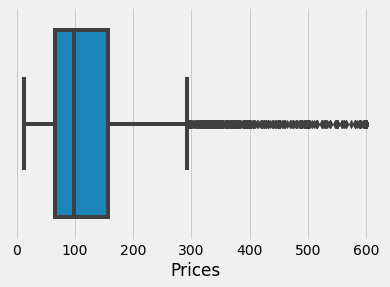

In [102]:
sns.boxplot(x = dataprices['price'])
plt.xlabel('Prices')
plt.savefig('Price_Distribution.png')

The boxplot above shows the distribution of the prices in our dataset. We can see that the 25th percentile lies somewhere between 60 dollars and the 75th percentile lies between 160 dollars. The median lies around 100 dollars. Also, even after removing outliers we can see that there are several outliers from out plot.

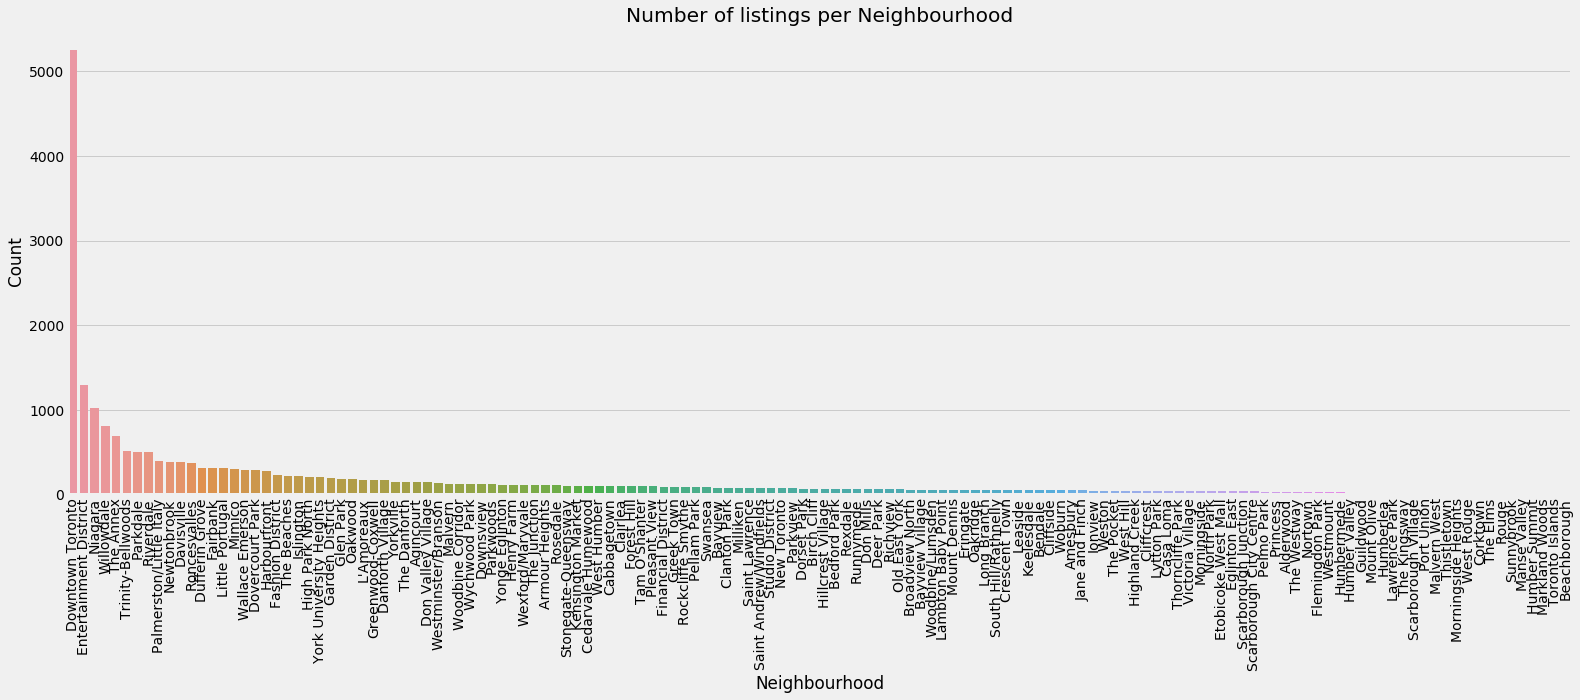

In [103]:
fig_dims = (24,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'neighbourhood',
              data = dataprices,
              order = dataprices['neighbourhood'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Number of listings per Neighbourhood')
plt.savefig('Number_of_listings_per_Neighbourhood.png')

The above plot basically shows us the number of listings in a particular neighourhood. Not surprisingly, we can see that downtown Toronto has the overwhelmingly most number of listings(more than 5000 listings under 600 dollars) followed by the Entertainment District which is followed more closely by Niagara. 

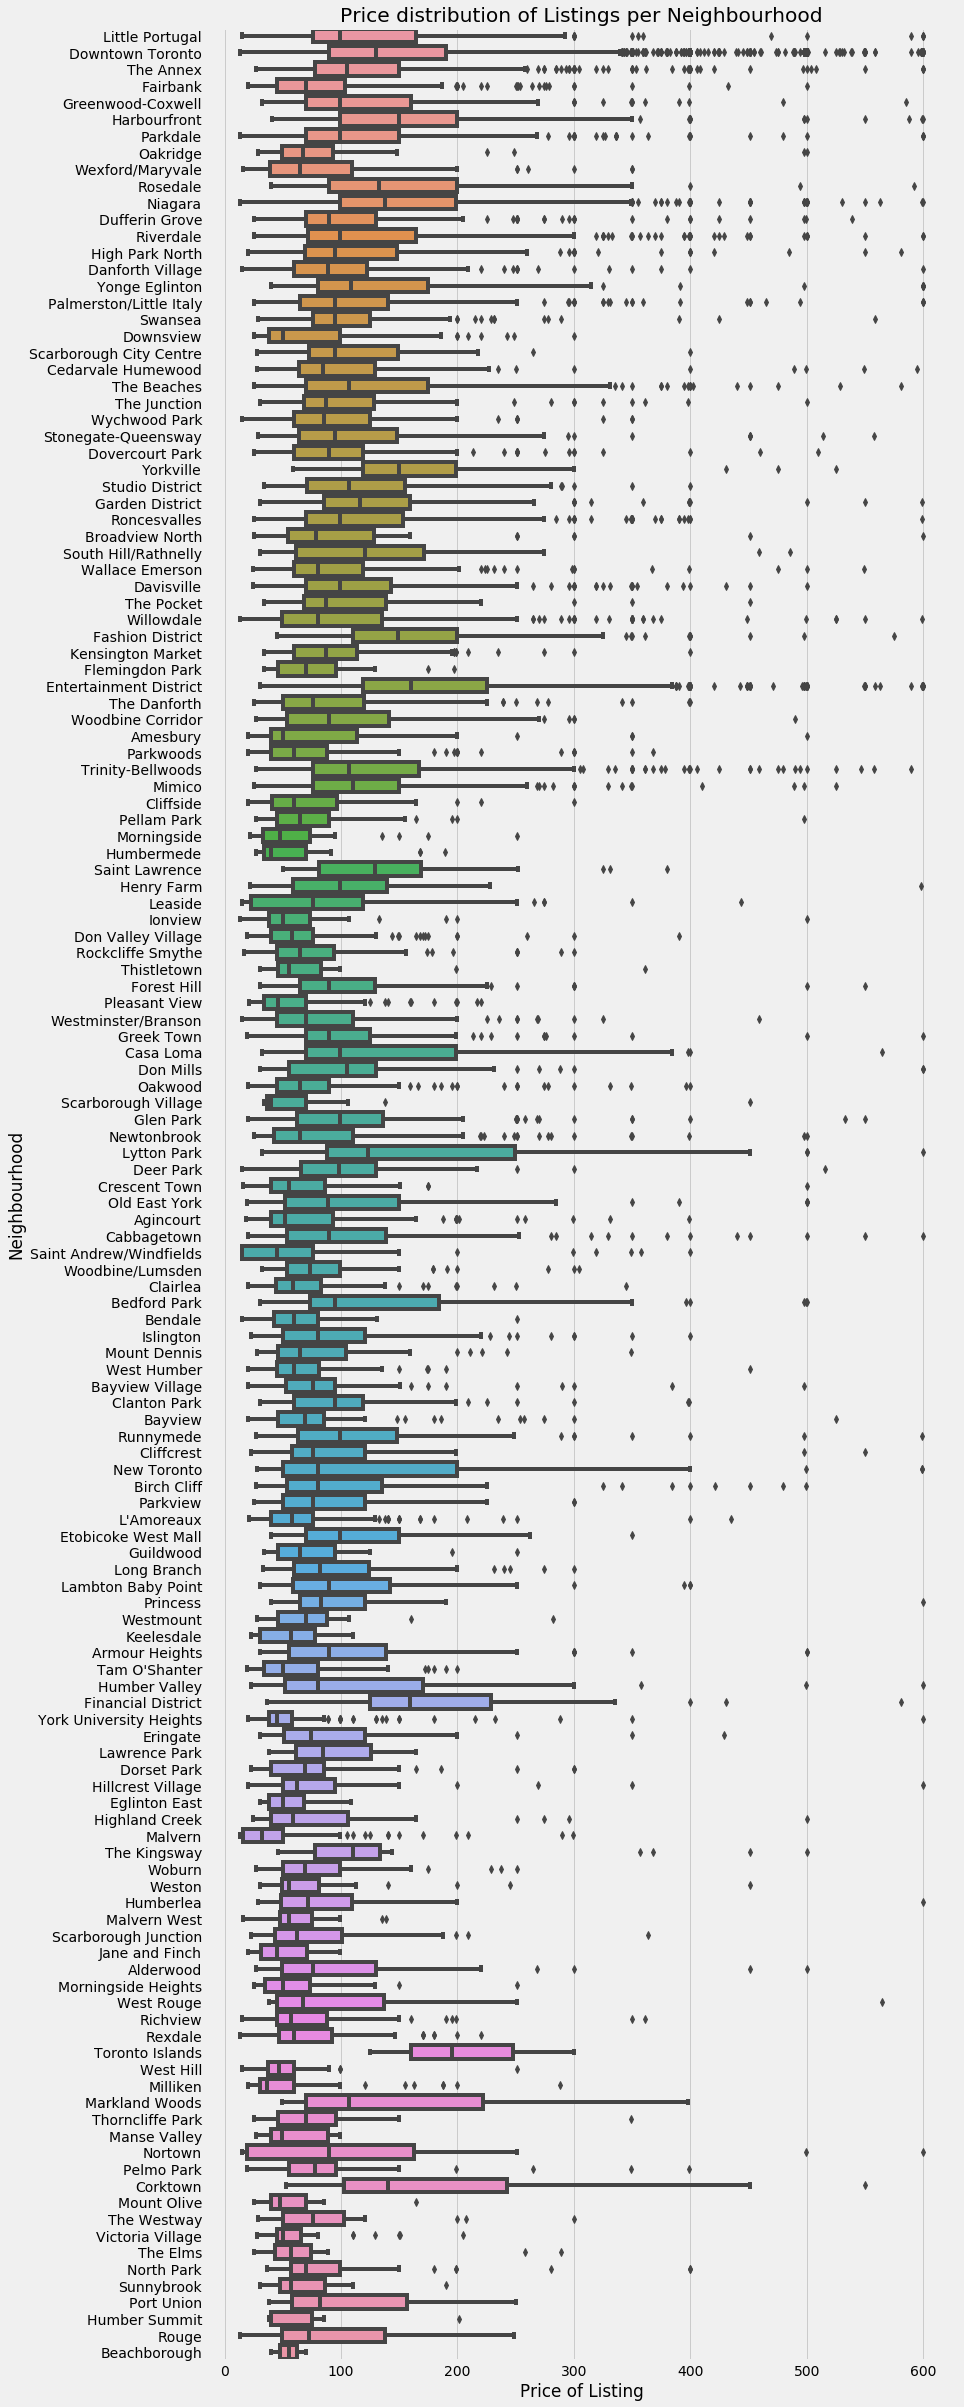

In [104]:
fig_dims = (12,40)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( y=dataprices["neighbourhood"], x=dataprices["price"])
plt.xlabel('Price of Listing')
plt.ylabel('Neighbourhood')
plt.title('Price distribution of Listings per Neighbourhood')
plt.savefig('Price_distribution_of_Listings_per_Neighbourhood.png')

The above plot shows us the price distribution of the different listings categorised by their Neighbourhood. What we can interpret from this plot is that Neighbourhoods like Downtown Toronto, Lytton park and the Entertainment District could prove to be more expensive whereas Neighbourhoods like Beachborough, York University Heights and Victoria Village could provide some of the cheapest options. However, it should be important to also look at the fact that the distribution of prices of some places could be high as there are more Listings in that particular neighbourhood

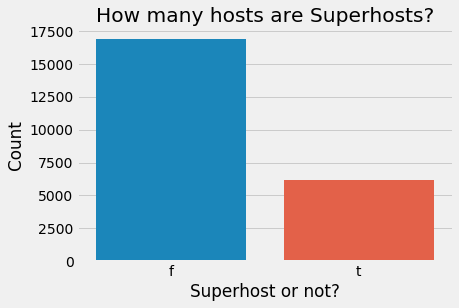

In [106]:
sns.countplot(x = 'host_is_superhost',
              data = dataprices)
data['host_is_superhost'].value_counts()
plt.xlabel('Superhost or not?')
plt.ylabel('Count')
plt.title('How many hosts are Superhosts?')
plt.savefig('How_many_hosts_are_Superhosts.png')

The above plot is basically a countplot that shows how many superhosts exist in Toronto. From the plot, we can see that there are more than 6000 hosts that are superhosts and more than 16,000 hosts that are not superhosts.

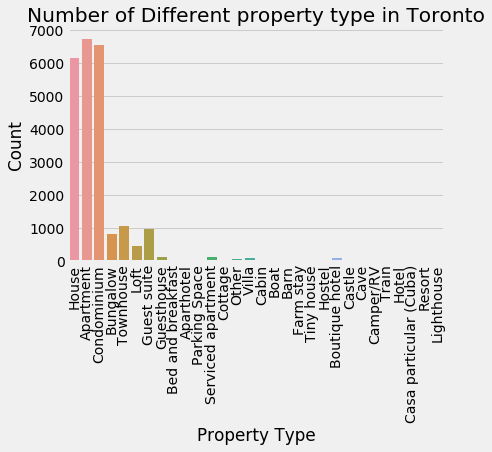

In [107]:
sns.countplot(x = 'property_type',
              data = data)
plt.xticks(rotation=90)
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Number of Different property type in Toronto')
plt.savefig('Number_of_Different_property_type_in_Toronto.png')

The above plot clearly shows that there are a majority of Apartments, Condominiums and Houses that are available to be rented.

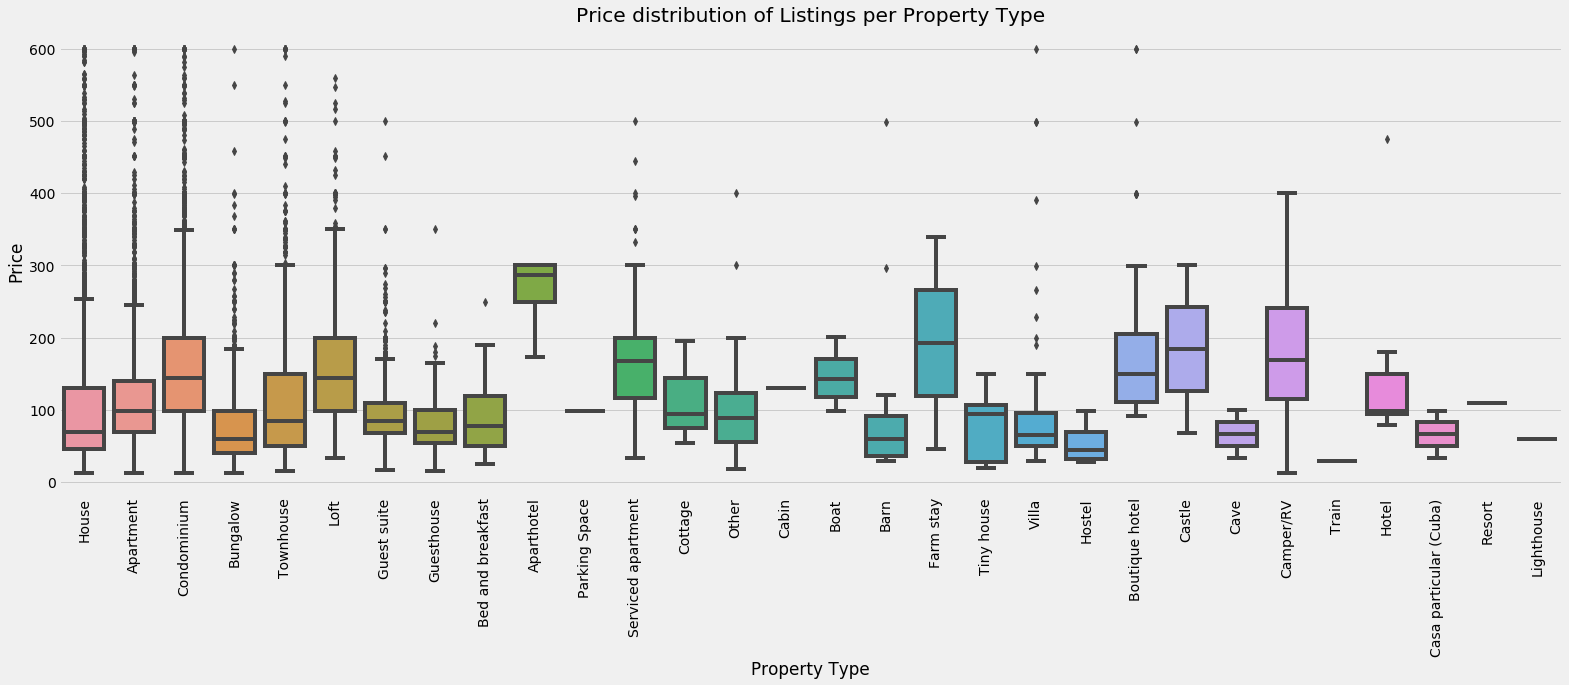

In [108]:
fig_dims = (24,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x = 'property_type',y = 'price', data = dataprices)
plt.xticks(rotation = 90)
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title('Price distribution of Listings per Property Type')
plt.savefig('Price_distribution_of_Listings_per_Property_Type.png')

Again, we can see that there are more variation in prices available for Condominiums, House and Apartments. This can be owed to the fact that there are a majority of them available to be rented. Another surprising statistic that we can glean from this is that Farm Stay and Camper/RV stay can also be expensive. 

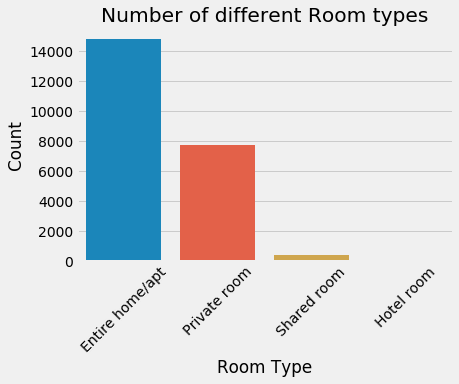

In [109]:
sns.countplot(x = dataprices['room_type'])
plt.xticks(rotation = 45)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Number of different Room types')
plt.savefig('Number_of_different_Room_types.png')

Entire home/apt have the most listings with Hotel room having the least listings which is understandable because Hotels are the enemies of airbnbs

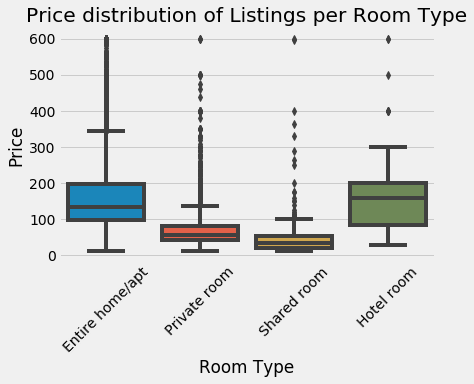

In [110]:
sns.boxplot(x = dataprices['room_type'],y = dataprices['price'])
plt.xticks(rotation = 45)
plt.ylabel('Price')
plt.xlabel('Room Type')
plt.title('Price distribution of Listings per Room Type')
plt.savefig('Price_distribution_of_Listings_per_Room_Type.png')

Now surprisingly enough, Hotel rooms can have more rent than a shared room or a private room. More importantly, it should be dumb to list a Hotel room as an airbnb listing. But to each their own, i guess

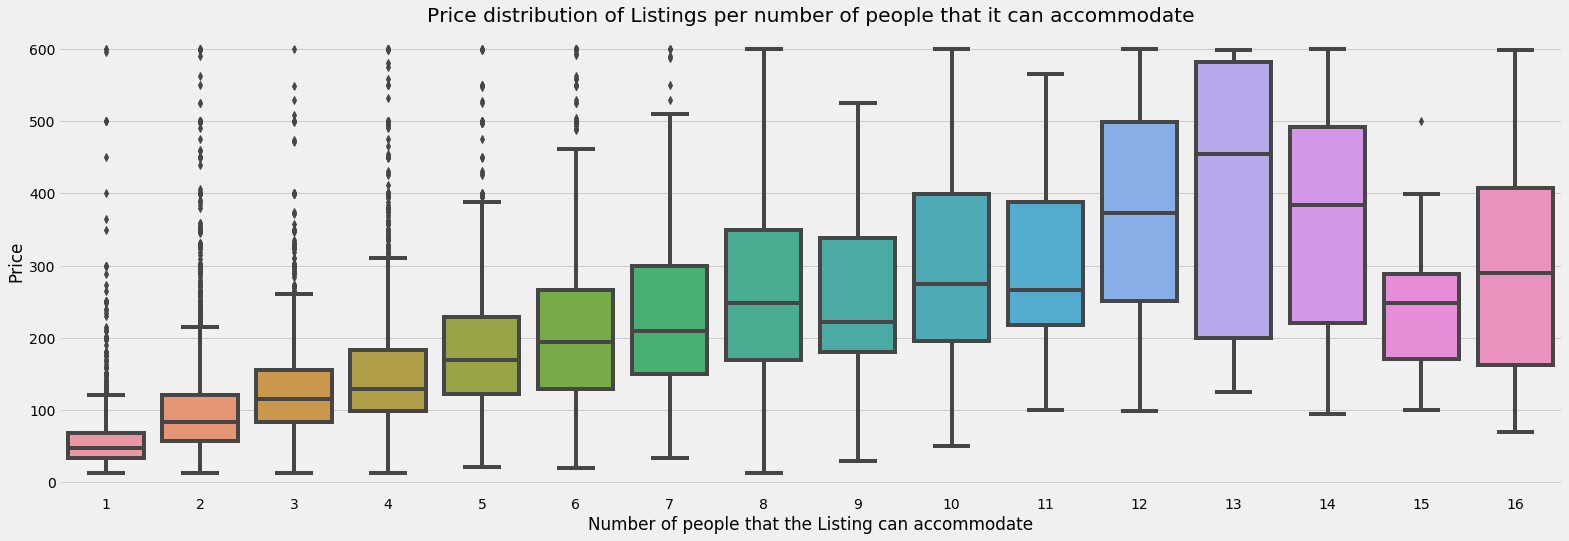

In [111]:
fig_dims = (24,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x=dataprices['accommodates'],y=dataprices['price'])
plt.xlabel('Number of people that the Listing can accommodate')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABiEAAAIdCAYAAABbdt7TAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4xLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvDW2N/gAAIABJREFUeJzs3XdYFFfbBvB7KaJiAUVARCBWbGBsqIiAEBHFQpaAUWMLYkliSaJYYpBoNJaoaKyv0U+NmiBrQ1ERKWLPa1SMLTaIBTvFgmVhvz+4dl4WlqbsDrD377q8kmGHmWfOzpxdznOKJD09XQEiIiIiIiIiIiIiIqIypid2AEREREREREREREREVDkxCUFERERERERERERERBrBJAQREREREREREREREWkEkxBERERERERERERERKQRTEIQEREREREREREREZFGMAlBREREREREREREREQawSQEERHprHnz5sHExASJiYlih1KsPn36wMTEBCkpKcLPUlJSYGJigrFjx4oWV5s2bdCmTRuVn23ZsgUmJiaYN2+eSFHlUpZZRff27Vv89NNPaN++PSwsLGBiYoItW7aU2fE1/RyMHTu2wL1L1KZNm0rxfOaVmZmJqVOnwtHREWZmZhXm86UsJCYmil7vm5iYFPg8Ki8q0vcN0k2VsU4mIqLyhUkIIiKqMExMTFT+1alTB7a2tujVqxc2bNiA7OxssUOsUJSNRmImMd6HusRMZfTLL7/gp59+Qo0aNfDFF18gODi42IY2ZcN/WSYrijsXG9dI14WEhGD16tVo2LAhJk6ciODgYNjY2IgdVqVRHpIMZdlQq+xI0KdPnzI5HlF5UB6eUyIiKp8MxA6AiIiotIKDgwEA2dnZuHXrFvbu3YuTJ08iPj4eGzduLPFxgoKCIJVKYW1tralQNcrKygqnT59GrVq1RIthz549op27OKtXr0ZWVpbYYby3gwcPAgDCw8NhYWFR5sfX9HMQEhKCSZMmwcrKSiPHJyovDh48iBo1amDnzp0wNDQUOxwqRyr69w0iIiKi98UkBBERVTjTpk1T2b548SI8PT2xe/duHD9+HF27di3RcerWrYu6detqIkStMDQ0RLNmzUSN4YMPPhD1/EVp2LCh2CGUidTUVADQSAIC0PxzYGlpCUtLS40dn6i8SE1NhbW1NRMQVEBF/75BRERE9L44HRMREVV4rVq1grOzMwDgzJkzws+V0ya8evUKc+bMwYcffoh69eph6tSpAIqeo/nGjRuYMGECHB0dYWFhgQ8++AA9evTAwoULC+z74MEDTJ06Fe3atYOFhQVsbW3h6+uLhISEUl+LTCaDq6srLC0t0aRJEwQFBQmN0PkVtibEgwcPMGPGDHTo0AFWVlZo2LAh2rVrh8DAQFy4cEG49r59+wIAtm3bpjLNlXIKn7zTNV25cgVDhgxBo0aNYGJigqSkJKGMixp2f/r0afTv3x8NGzZEw4YN4efnh3PnzhXYr6h1A9Rdp4mJCY4dOwYAcHR0FGLPG0tha0IoFAr83//9Hzw8PGBtbY369eujW7duWL58Od68eVNgf+V9JJfL8fPPP6Ndu3YwNzdHq1atMHPmTLx+/brQ61fnwYMHmDx5MhwdHWFubo4PPvgA/v7+OHr0aJFlou4ay0Jhz0FiYiICAgLQqlUrmJubo0mTJnBzc8OMGTOgUCgA5JbNtm3bAAB9+/ZVuY8Kuw5AdRqSJ0+eYMKECWjevDnMzc3RuXNnbNq0SW2sr169wty5c+Hg4ABzc3M4ODhgzpw5eP36tdqyef36NVauXInu3bvDzs4OlpaWaN26Nfz8/Eo8ikdZPlu2bMGBAwfw0UcfwcrKCnZ2dhg+fDhu3bpVaKzLly+Hq6srGjRoACsrK7i5uWH9+vVC+akrj3v37mHMmDFo1qwZ6tSpg7179xYZX941WJKSkuDv7w8bGxvUr18f3t7eOHnyZIHfKe3zlvd3EhMTERERAVdXV9SvXx/29vaYPn268BzExcWhd+/esLa2ho2NDYKCgvD06dNC43/9+jXmzJkjvKcffvghFixYoPZZBICbN2/iq6++QuvWrWFubo7GjRtj8ODBauuVvO/d/v370atXLzRs2BC2trZFlmnec40bNw4tW7ZEvXr10LRpUwwfPlyoR5WUdY1CocDt27eFZ6Ak0+wo6xdNlgOQu17F7Nmz0bFjR1hYWMDGxgY+Pj6IjIwssG/e+zE1NRVBQUFo3LgxLC0t4ebmhh07dpSg9P4nIyMDP/74I7p06YL69evD2toavXr1wq5du0r0+8rPIgAq5VvYdIIvX77EzJkzhbL58MMPsWTJkgLPHQD89ttvGDJkCBwdHWFpaYmGDRvCy8tLqNfyl8nt27cBqE4PWZL3OX89u2XLFjg6OgIAjh07pnK8kq6rkZ6ejrlz58LZ2RkNGjSAtbU1nJycEBwcjIcPHwr7Xb9+HbNmzYKbmxsaN24Mc3NztG7dGuPHjxeuJ6+8n/0pKSkYOXIkGjVqBAsLC7i6uiIqKqpE8Snt3bsXo0aNQrt27WBlZYUGDRqge/fuWLlyZaHTaCrrzx49eqBhw4aoX78+2rVrh6+++go3btxQ2Tc7OxubNm2Ct7c3bG1tYWFhAQcHBwQGBuLs2bMq+75+/RphYWFwdnYW7kVPT09s2rRJ7f2h/Fx5/vw5pk2bhlatWsHS0hLdunUT6ma5XI4FCxYI3wHbtm2LtWvXFlmut27dwtChQ/HBBx/A2toavr6+uHTpEgDg0aNH+PLLL9G8eXNYWFjAzc0NR44cUVtOpXmugdzvP2vXrkXnzp1hYWGBFi1a4Ntvv0VGRoba/d+8eYO1a9fCz89PeJ5sbW3Rr18/YZRm/usDin9OS1t/ERFR5cCREEREVOkNHToUSUlJ8PDwgKmpKezs7IrcPyYmBkOHDkVWVhbc3Nzg6+uLFy9e4PLly5g3bx4mT54s7Hvx4kX4+vri0aNH6NGjB3r37o2nT59i3759GDBgAJYtW4bPPvusRHGuWLECM2bMQK1atRAQEAATExPExsaiZ8+eJZ5y6eXLl+jZsydSUlLg6uqKXr16AQDu3r2L+Ph4dO/eHW3atEG3bt3w77//Ytu2bWjdurVKI0r+htxbt26hZ8+eaN68OQYOHIiMjAxUr1692FjOnDmDJUuWwN3dHaNGjcKNGzcQGRmJY8eOYdeuXXBycirRNakTHByMrVu34vbt2xgzZgxq164NAMJ/ixIUFITt27fDysoKgwYNgqGhIQ4cOICZM2ciJiYGMpkMBgYFvyIFBgbixIkT8PT0RM2aNXHo0CEsX74cjx49wurVq0sUd0pKCry9vXHv3j04Ozvj448/xv3797Fr1y7ExMRg6dKlGDp0KIDchk0bGxusWrUKmZmZwjRkJbnG9xUdHY2AgADUrFkT3t7eaNCgAdLT03Hjxg2sWbMGoaGhMDAwwNixY7F161b8/fff+PTTT0s9/31GRga8vLxQpUoV9OvXD69fv8bu3bsxfvx46OnpYciQIcK+CoUCQ4YMQUxMDBo1aoRRo0ZBLpdj27ZtuHz5strjjxkzBjt37oS9vT38/f1hbGyM1NRU/PXXX9i7dy/69etX4lgjIyMRExODvn37wsXFBUlJSdi1axcSExMRHR2Nxo0bC/s+e/YMAwYMwJkzZ+Dg4IBBgwYBAA4fPoyvv/4af/75J1atWlXgHGlpacLzPmDAAMjlcpiampYovnPnzmHZsmVwcnLC0KFDcefOHezZswf9+/fHkSNH0Lx58xJfa1HWrl0rJBq6du2KAwcOYOXKlXj69Cm8vb0xevRo9OrVC8OGDUNCQgLCw8Px9OlTREREqD3e8OHDce7cOfTt2xcGBgbYt28f5s6di3PnzmHr1q0q+yYkJGDw4MF49eoVvLy80LhxY6SmpgrvzdatW+Hh4VHgHLt27RLq0hEjRuDBgwfFXufZs2fRv39/ZGZmwsvLC61atcKtW7cQGRmJ/fv347fffsNHH30EABg0aBC6deuG+fPno1atWkKDW2meB02WQ3p6Onr16oUrV67AwcEBY8aMQUZGBnbt2oXPPvsMU6ZMwfTp0wvElJ6eDi8vL9SuXRtDhgxBeno6du7ciZEjRyI1NRVffPFFsdd179499O3bFzdu3ECXLl0wfPhwvHz5EtHR0Rg+fDiCg4MLjG7Mz8bGBsHBwQXKFyj4eSWXy4V61dPTUyjL0NBQZGVlFbjOb7/9Fs2bN0fXrl1haWmJJ0+eIDo6GmPHjsW1a9fw/fffA8itd4ODgwvUx8r4SqtNmzYYM2aMsIaIso4AgG7duhX7+//++y/69u2LlJQUtGzZEkOHDoW+vj5u3ryJzZs3w8fHB+bm5gBy667169fDxcUFnTp1QpUqVXD58mVs3rwZ+/fvR3x8PBo0aFDgHLdv34aHhwc++OADBAQEIC0tDTt37sTgwYOxa9cuuLq6luhaQ0NDoaenJ3SMyMjIQEJCAqZPn46//voL69atU9k/PT0d/fv3x/nz5/HBBx9g4MCBqF69OlJSUhAZGYnOnTsL9e2bN28waNAgxMTEwNLSEr6+vjA1NcWdO3eQmJiIxo0b48MPPwQAvH37FlKpFEePHkWTJk0wcuRIvHnzBnv37sX48eNx/PhxtZ/lcrkcvr6+yMzMRJ8+ffDs2TPIZDIMHToUO3bswJo1a3Dx4kXhmZPJZJgyZQrMzMzw8ccfq33vPDw80KpVKwwePBhXr17FoUOH4OPjg4MHD0IqlcLMzAxSqRSpqanYtWsXPvnkE/z3v/9VGeH5Ls/11KlTsWbNGlhYWGDo0KEwMjJCVFQUzpw5g7dv3xaINS0tDVOnToWTkxPc3d1hZmaG+/fvIyoqCgEBAVi6dCmGDx8OoOTP6bvW40REVPExCUFERBXe5cuXhV7x7dq1K/D6nTt3cOzYsRJNhfDkyROMHDkSr169wvbt2+Hp6VngWErZ2dkYNmwYMjIyEBkZqdJwcP/+fXh4eGDy5Mnw8vISGgMKk5KSgtDQUNSqVQtHjhwREiUhISEYOXJkiXuMxsfHIyUlBaNHj8b8+fNVXsvOzsazZ88AAC4uLgByR0G0adOmyEagkydP4uuvvxYaY0oqJiYGCxcuxKhRo4Sf7d69G8OGDcOXX36J06dPQyKRlOqYStOmTcPRo0dx+/ZtjB07tsQ9myMiIrB9+3a0atUK+/fvF5I7ISEh8PPzQ0JCAlauXInx48cX+N2UlBScOnVK6Ok3c+ZMdOvWDeHh4Zg1a1aJphyaNGkS7t27h6lTpwojcgDgyy+/hKenJyZPnowePXrA2toaPj4+8PHxwdatW5GZmVlsQ11ZUvYKjYyMFHrrKj19+lRI0owbNw4XLlzA33//jUGDBgn3VUn9/fffGD58OH7++Wfo6+sLx3R2dsayZctUkhDbtm1DTEwMnJycsHv3blStWhUAMGPGDKExOC9lY4yjoyMOHz5cILH05MmTUsV64MAB/PHHH/Dy8hJ+tnz5csycOROTJ09W6R0+ffp0nDlzBrNmzcLEiROFn79+/RqfffYZtm3bhr59+6J3794q57h06RICAgKwYsUKtYmwohw8eBBr1qxBQECA8LMNGzZg0qRJWLNmDRYvXlyq4xUmMTERR44cQaNGjQDkNmq1b98ef/zxB6Kjo7Fv3z60b98eQG4DoZubG2JiYpCUlAQHB4cCx/vnn39w4sQJleeqT58+iIqKQkREBPz8/ADkvp8jRoyAoaEhYmJiYG9vLxzj6tWr8PDwwBdffIHz58/DyMhI5RwxMTFq6/PCKBQKjBkzBpmZmVi5cqVKA3F8fDx8fX0xZswYXLhwAdWrV8fgwYMBAPPnz0ft2rXf6VnVZDnMmjULV65cweDBg/HLL78I9a6yvlm4cCG8vLyE901JmWT/9ddfoaeXO4B+4sSJcHV1RWhoKPr27VtsA/zYsWNx8+ZNrFu3TrgGILcHt4+PDxYsWIA+ffqovTeUbG1tMW3atBKVb2pqKhwcHLBr1y6hjggODkb79u2xevVqTJ48WWW6rBMnThSYVvD169eQSqVYtmwZPv/8czRo0AAmJiaYNm1amdXHDg4OqF27NlavXg0bG5tSH2/UqFFISUnBt99+i++++07ltWfPnqmMMAgICMC4ceMKPBeHDh1CQEAAFi1ahCVLlhQ4x9GjRzFjxgyVjheffPIJpFKpMMqrJMLDwwuUcU5ODsaMGYPw8HCMHj0aHTt2FF6bPHkyzp8/j4EDB+KXX35RqQtfvXqF58+fC9vz589HTEwM3NzcsHXrVpUOEtnZ2Xj06JGwvXz5chw9ehQ9evTA77//jipVqgAAvvvuO/Tq1Qu///47evXqhQEDBqjEmpqaig4dOmDfvn3C73h4eCAwMBBDhw5Fy5Ytcfz4cdSoUQMAMHDgQHh5eWHJkiVqkxDHjh3D7Nmz8dVXXwk/mzhxojBCc/DgwZg7d67wnLZu3RqzZ8/GypUrVUbJlPa5PnXqFNasWQMbGxvExcUJ34lnzpyJ/v374/79+wViNTExwYULFwokqZQJylmzZiEgIADVqlUr0XP6PvU4ERFVfJyOiYiIKpx58+Zh3rx5mDNnDkaNGgV3d3dkZWXBx8dHmJYpr+nTp5d4LmZlA8OwYcPUNljlXVQyOjoa169fx+eff16g56KlpSW++uorvHr1Crt37y72vNu3b8ebN28watQolZEaenp6mDVrltBAWxxlQ5G6kQr6+vpqpycqjrm5uUqvz5Jq1KgRPv/8c5Wf9e/fH05OTrh27RpOnTpV6mO+r99++w1AbtIh7+iSKlWqYO7cuQBQ6OLms2bNUik/Y2Nj+Pv7Iycnp0RTCNy9exexsbGwsrLC119/rfJaq1atMHLkSLx+/Rp//PFHqa+rrBV1H9WpU6fMzlO9enXMmTNH5f62t7dH586d8c8//whJMwD4/fffAeQ+z8rGRQCoVasWvv32W7XXoFAoYGRkpPb5Ke387N27d1dJQAC5DazW1taIjY3FvXv3AOT2HN22bRscHBxUEhAAYGRkJCTz1L3PVapUwZw5c0qdgACALl26qCQgAGDIkCEwMDDAX3/9VerjFWbMmDFCAgLI7SHeq1cvKBQKeHt7qzRkV6lSRWjQ+/vvv9Ueb/LkySrPVbVq1YRGVeXzCuS+/0+fPkVwcLBKwxUANG/eHEOHDsX9+/cRHx9f4Bze3t4lTkAAuY11V69eRbt27VQSEADg5uYGHx8fPHnyBPv27SvxMYujqXJ4+/YtwsPDUb16dYSGhqokfhs0aICvv/4aCoVC7RRo+vr6CAkJEeoDIHcdoMDAQLx58wbh4eFFXtPFixeRkJCAPn36qCQggNzndurUqVAoFNi+fXsxpVM68+fPV6kj6tWrhz59+iAzMxPXrl1T2VfdukZGRkbCSKvCpsER07lz53Dq1CnY29urbeitWbOmyr1kZWWltkH3o48+gr29PWJjY9Wex8bGpsBnlYeHBxo2bFiqOkVdGevp6WHcuHEAoHL+R48eQSaTwczMDAsWLChQF1atWhVmZmYAcpMM69atg5GREcLCwgp8Xunr66t0DlA+Rz/++KOQTABy6zBlvVzY53/+3/H19YWhoSEyMzMxc+ZMIQEBAE5OTrCzs8OlS5fUTjdlZ2dXYBSRv78/gNzkzMyZM1WeU2W9nncauHd5rpVTbX7zzTcqn39GRkaYOXOm2us2MjJSO0rGxMREGB1VmnvhfepxIiKq+DgSgoiIKhxlD3+JRIKaNWvC0dERn3zyiTAkPL8OHTqU+Nj//e9/AQA9e/Ysdl9lI/qdO3fUzuF88+ZNALk9XItz/vx5AFCbRLGzs0ODBg3w77//FnscZ2dnWFtbY+nSpTh79ix69uwJJycnODo6vlPDJpDbC+9deqR16dJFpfFKqWvXrjh16hSSkpLQuXPnd4rpXSnLWV2P/datW6NevXq4ceMGnj9/rtKoAABt27Yt8DvKP87T09OLPbdyHY3OnTurNGYoubm5YcWKFUKMYvL398eePXvg4eEBX19fuLi4oGPHjiUecVJSjRs3LlDOwP/KNSMjAzVr1gSQW34SiUTtPaNuaq+aNWuid+/eiIqKgrOzM3x8fNClSxd07NhR7TmLo+7ZNDAwgJOTE+7cuYOkpCRYWVnhzJkzkMvl0NPTU1svyOVyACjQGArkNvrVq1ev1LEB6u9PQ0NDmJubl+j+LCl1PdaVDX3q1itRvqZM0uSnrly7du0KiUQiPDPA/+rbixcvqi3X69evA8itb/Mni0rzGQD8r57o3r272tfd3NwQGRmJ8+fP45NPPinVsQujqXL4559/8PLlS3To0EFovM1/LQDU1jvW1tZqpy90dnbG4sWLVeJSRxnrs2fP1MaqHI1Uks/Ikqpdu7bamAurq2/fvo2wsDDEx8fj7t27yMrKUnm9sDWZxPTnn38CyE0IlKSDgkKhQHh4uDB1Xnp6ukrjuLrPIyD3eVZ3/AYNGuD06dMljvfp06dYtmwZoqOjkZKSghcvXqi8nreM//rrL+Tk5KBLly7FTkP5zz//ICMjA46OjsV+Nj179gw3b96Eubk5WrRoUeB15agOdc+BiYlJgRE/+vr6qFevHu7du1dovZecnIwHDx7AyspK5bXWrVsX+G6krCcbNWpUIJmirg59l+e6qO+ZnTt3hoGBgfD5lNfly5exbNkyHD9+HPfv3y+wDlZpnpH3qceJiKjiYxKCiIgqnNI2qFlYWJR4X+XifPn/aFRHudjqnj17ilzkNv8f3OpkZmYCQKENkObm5iVKQijXKpg/fz6ioqKE3mTKOb1nzJhRovUc8p/7XRT2e8prVF6zNmVmZqJWrVqoVq2a2tctLCzw6NEjZGZmFmioVrcWg7KBprDFNfOfGyi8XJT3qRjlkp+Pjw9kMhmWL1+Obdu2Cb1DW7ZsieDgYPTv379MzlNYI5O6cn327Blq1aqlNiFWWJmuX78ey5cvx/bt27FgwQIAuQ3zvXr1wpw5c0qVVCnp/aysF86dO1fkCJm8U4oUd46SKKosS3J/lpQyKZT/HMW9pm6+cUD9NVetWhU1a9ZUeRaU5bp58+Yi41NX35a2XMV4VjVVDu9zLe9bhytjTUhIQEJCQrGxloXS1CnJycno0aMH0tPT0aVLF/To0QO1atWCvr6+sGZS/gbX8qA031OA3NFjq1atgqWlJTw8PFC/fn1hpIhybSV1iirLnJycEp07PT0d7u7uSElJQfv27TFw4ECYmppCX18fGRkZWL16tUoZl+baSrNvcc9B9erVUatWLbX3tLp6DfjfPaWunIqq90pbhyo7kOQ91rs810V9z9TX10edOnVUFjQHchNe/fr1g1wuh6urK7y9vVGzZk3o6enhwoULiIqKKtUz8j71OBERVXxMQhARUaVXmnUHlA3NqampBebCz0/5h+emTZtKtcBtUcfKO39xXvn/MCxK/fr1sXTpUixZsgT//PMPjh07hvXr12PFihXIyMjAL7/8UqrY3nXdhsJiVl5j3j/clb0C1TWWKhsaykKtWrWQlpaGrKwstYkI5YK1JV0IvLTnBgovF02e+114eHjAw8MDWVlZOHPmDGJiYvDrr79i+PDhBdZA0YaaNWsiIyMDr1+/LpCIKKxMq1atismTJ2Py5MlITU3FiRMnEB4ejsjISFy5cgXHjx9XmR++KCW9n5X/DQoKEhIfJfWuz1ppaet5K4mHDx+qLLYK5M77/uzZM5VFuZXlGh8fr3bUR1FKW65iPKuaKof3uZbS1OFFnXvOnDn48ssvi41V21asWIGnT59ixYoVwroeShEREdi2bZtIkRUt7/eU4jx69Ahr1qxBy5YtcfDgwQKN3DKZTCMxKm3evBkpKSlqFyA/ffp0gYWgS3Ntpdm3uOfg5cuXyMzMLNPpBjXpXZ7rvN8z83eqyM7OFhIEeS1atAhZWVmIjIwsMIJ08eLFiIqKeqe436UeJyKiio9rQhAREeWhXBwxOjq6xPueOHHivc+rTHgoF9jOKzk5GXfv3i31MSUSCZo3b46RI0di//79MDIywt69e4XXS9OL/12cPHlSbW/J48ePA1Cd1kU5f3Xehb+Vzp49q/b4yvhL2iMT+F85Hz16tMBrly5dwqNHj9CkSZN3mq6nOMrrPXXqFN68eVPgdWVP4fL2h3m1atXQrVs3zJo1C7Nnz4ZCoVBpeHiX9+FdODg4QKFQ4OTJkwVeK8n6IvXr18fHH3+M33//HZ06dcK1a9dw9erVEp9f3bMpl8uFcyvf3w4dOkBPT69M6gVNeZfnTVPUlevx48ehUChU6oiyrG+Lo6wnEhMT1b6uiWdVU+XQrFkzVK9eHZcuXVK7GHtR13Lnzh2kpKQUGmtRi0kDQKdOnUoVa3H09PTKtJ5RTpmorhOBuvcDKNvPzXetO5X3QGxsbLFxJCcnIycnB+7u7gUSEHfv3kVycnKpzl1apS3j9u3bC/Vn3jWB1GnWrBlq166Ny5cvFzqaQ6lmzZpo1KgRHj58iCtXrhR4Xbn2R3n7/C3MuzzXRX3PPHnypNqpmG7evAlTU1O1U1gW9owU9Zxqsx4nIqLyh0kIIiKiPAYNGoRatWph48aNiIuLK/B63mRA79690ahRI2zYsKHQ3mDnz59X27ssv08++QSGhob4z3/+o9IokJOTg9DQ0BI3eFy6dElto8LTp0/x9u1blcU6lQsTqmuILAs3btzAr7/+qvKz3bt349SpU2jatKnKPP7KP0z/7//+DwqFQvj5v//+K6wBkp8y/uIaH/L67LPPAAA//PCDynQ4b9++xYwZMwAAQ4cOLfHxSqNBgwbw8PDA3bt3ERYWpvLa5cuXsX79ehgZGQkLVIopPj4eL1++LPBzZe9KdfdRad6HdzFw4EAAwNy5c1Wmf8jMzMSiRYsK7P/48WNh7vS8Xr9+LfT2z3sdxTly5AgOHjyo8rNVq1bhzp07cHd3F6YEMTMzQ0BAAC5cuIB58+apbdi5e/dumc6DX1rv8rxpysKFC1Wm2MvKysKcOXMAQKV3+pAhQ2BiYoKFCxeqnY9eoVDgxIkTahN8peXk5ITmzZvjzJkzBRYQT0hIQGRkJOrFDb2YAAAgAElEQVTWrYvevXu/97mUNFUOhoaGCAgIwMuXLxEaGqryfqempmLJkiWQSCQYMmRIgWNlZ2dj1qxZKg2Kt27dwrp162BoaFjsehht27aFs7MzoqKisHHjRpVzK12/fr3EdUfdunXx+PHjAus2vCvlPP/5k02HDx9Wu1C3MgagbOo7U1NTSCSSUh+rbdu26NKlCy5duqT2eX3+/LlQxymv8eTJkyrfI54/f44JEyaorZ/KUmFlfP78eSxZsqTA/mZmZvDz88OjR48wderUAt99Xr9+jcePHwPITeKMGjUKr1+/xsSJEwvcF9nZ2bh//76wrfz8/+677wpMbfTDDz8A0Nznf1l7l+d60KBBAICff/5Z5Xvp69evMXv2bLXnsbGxQVpaGv7++2+Vn2/atAmHDx9W+ztFPafarMeJiKj84XRMREREedSpUwfr16/H0KFD8fHHH8Pd3R2Ojo548eIF/vnnHyQmJgq9zgwNDfHbb7/h448/xqBBg9ChQwc4OjrC2NgYd+/eRVJSEq5du4YjR44UO8Tf1tYWISEh+O6779C9e3f4+vrC1NQUhw8fRnp6Olq1aoWLFy8WG398fDxmzJiBjh07olmzZjA3N8eDBw8QFRWFnJwcTJw4Udi3adOmaNiwIU6cOIFRo0ahcePG0NfXh7e3N1q3bv1+BQnA09MT3333HWJiYtCqVSvcuHEDkZGRqFatGpYvX64yRYq3tzeaN2+OHTt24O7du+jUqRPu37+P/fv3w8vLS+2UEe7u7ti5cycmTJiA/v37w9jYGLVr10ZQUFChMUmlUhw4cADbt29H586d0adPHxgaGuLAgQO4fv06XF1dMXbs2Pe+9sIsXrwYvXr1wo8//ogjR46gY8eOuH//Pnbt2oWsrCyEhYXB2tq6zM63efNmtaM+AKBPnz7w8fFR+9p3332Hf//9F87OzrCxsUHVqlVx8eJFHD58GHXq1MGwYcOEfXv06IGwsDD88MMPuHz5stDLfvLkyWV2HQDw6aefYseOHYiJiUGXLl3Qu3dvyOVyREZGwtHREVevXlVZ7PPevXv46KOP0LRpU7Rt2xYNGjTAixcvEBsbixs3bqBv375o0qRJic/v7e2NwYMHo1+/frCzs0NSUhJiYmJQp06dAkmQBQsW4ObNm5g/fz7++OMPdO3aFRYWFnjw4AGuX7+OP//8Ez/++COaNWtWZuVTGu/yvGlK8+bN0aVLF/Tr1w8GBgbYt28fkpOT0bt3b/j5+Qn7mZqaYtOmTRgyZAh69uyJ7t27w97eHoaGhrh79y7++9//4s6dO0hOTi50od2SkkgkWLVqFQYMGIAxY8Zg586daNWqFW7duoU9e/agSpUqWL16danX1ymKJsshJCQEJ06cwKZNm5CUlAQ3NzdkZGRg165dSEtLw5QpU9Qu3t2qVSucOXMGbm5u6NGjB9LS0rBz505kZmbixx9/LNGaKuvWrUP//v0xYcIErFmzBh07doSpqSnu3buHK1euICkpCb/99luBqajUcXd3R3h4OKRSKbp27QojIyO0bt0a3t7epSjp//n888+xZcsWjBgxAv369UP9+vVx+fJlxMTEwNfXFzt27FAbw5kzZ/DZZ5+hZ8+eqFq1Kho2bCgkSUvD2NgYnTt3xokTJxAQEIC2bdvCwMAAXbt2Vbt4cF5r1qyBj48PFixYgKioKHTv3h36+vpISUlBbGwstm3bBhcXF1hYWEAqlUImk8HFxQXu7u7IzMxEXFwcqlatijZt2uDChQuljr2kBg4ciGXLlmH69Ok4evQoGjdujBs3buDgwYPo27ev2jJesGABrly5gi1btuDEiRPw8PCAsbEx7ty5g9jYWMyePVtIzE2ZMgVnz57F4cOH0a5dO/Tq1Uu4vxITEzFkyBBhGqgvvvgCMTExiImJQdeuXeHl5YW3b98iMjIS9+7dw8CBAzFgwACNlUVZK+1z3blzZwQFBWHt2rVCXWNkZISoqCjUrl0blpaWKkkbABg7diwOHz4Mb29vDBgwALVq1cLZs2dx8uRJ9O/fH7t37y4QV1HPqTbrcSIiKn+YhCAiIsrH09MT8fHxWLp0KRISEpCYmCgM5Z8+fbrKvi1btsSxY8ewatUqREVFYdu2bVAoFLCwsIC9vT2++uorNG3atETn/fLLL2FpaYlly5bh999/R40aNeDh4YHQ0FAEBgaW6BgeHh64c+cOTpw4gQMHDiAzMxPm5ubo1KkTxowZA3d3d2FfPT09bNmyBSEhIYiOjkZmZiYUCgWsrKzKJAnRvn17TJkyBXPmzMHatWsB5P5xOnPmzAJTHhgZGWH37t34/vvvcejQIZw7dw6NGzfG3Llz4erqqrZRdMiQIbh79y7Cw8OxYsUKvH37Fg0bNiwyCQHkNt507doVmzdvxubNm5GTk4PGjRvjhx9+wJgxY0q8RsC7sLW1RXx8PBYtWoQDBw7g5MmTMDY2hrOzM8aPH692yoP3cfLkSbXTFwG5PRwLS0J888032LdvH86ePSv0YLWyssLYsWMxbtw4lUSJq6srFixYgA0bNmDdunXCKIWyTkJIJBL89ttv+Pnnn/HHH39g7dq1sLCwwMCBA/H5558jKipKZf5rGxsbTJ8+HYmJiTh27BgeP36M2rVro1GjRpgwYYLQK7SkfHx8MHz4cOG9MzQ0RP/+/RESEoJGjRqp7FuzZk3s3bsXmzdvxvbt27F37168evUK9erVg42NDb7//ntRG7ve5XnTlA0bNmDBggUIDw/HgwcPUL9+fUybNg2TJk0qsJZD9+7dcezYMfzyyy84fPgwTp8+DQMDA1hYWKBjx44ICQkps3Ua2rVrh/j4eCxcuBDx8fE4fPgwateujT59+uCbb74pdiqi0tJkOZiYmODgwYMICwvDnj17sHLlShgZGcHBwQGjR48udE0jExMTREREICQkBJs3b8bz589hb2+P8ePHQyqVlui66tevj7i4OPznP//B7t27IZPJ8PbtW5ibm6NJkyb46aefSry+zE8//QQ9PT3ExcXh1KlTyM7OxqeffvrOSYjWrVsjMjISc+bMQXR0NLKzs9G6dWts3rwZtWvXVttA/s033yAzMxNRUVEICwuDXC6Hs7PzOyUhAGD16tWYMWMGjh8/jkOHDiEnJwfBwcHFJiFsbGyQkJCAX375BXv37sX69ethaGiIBg0a4LPPPoO9vb2w7/Lly2FnZ4cdO3Zg3bp1MDMzg7e3N6ZPny6MDtCU+vXrY//+/Zg1axZOnjyJ2NhYNG3aFD///DNcXV3VlrHyfl2zZg1kMhm2bNkiHKtv377o0qWLsG+VKlUQHh6OjRs3Ytu2bdi+fTvkcjksLCzg7Oyscm9UqVIFO3bswKpVqxAeHo5169ZBT08PLVq0wNSpUzVeFmXtXZ7r+fPno0mTJli3bh02btyIOnXqwMfHBzNnzlT7HHp6euL333/HokWLsHPnTujp6aF9+/aIjIxEcnKy2iREcc+pNutxIiIqXyTp6ekFx8USEREREVUQcXFx8PX1hZ+fH9atW1emx543bx7mz5+vdvFaovfVpk0b3L59W2UqJrGlpKTA0dERzs7O2Ldvn9jhEBEREVElwDUhiIiIiKhCyD9VBJC73smsWbMAqF/8lIiIiIiIiMTF6ZiIiIiIqEL4/vvvce7cOXTq1AlmZma4d+8eDh06hLS0NPTu3Rt9+/YVO0QiIiIiIiLKh0kIIiIiIqoQ+vTpg0ePHiEmJgZPnz6FoaEhmjVrhilTpmDUqFEF5s4nIiIiIiIi8XFNCCIiIiIiIiIiIiIi0giuCUFERERERERERERERBrBJAQREREREREREREREWkEkxBERERERERERERERKQRTEIQEREREREREREREZFGMAlBREREREREREREREQawSQEERERERERERERERFpBJMQRERERERERERERESkEUxCEBERERERERERERGRRjAJQUREREREREREREREGsEkBBERERERERERERERaQSTEEREREREREREREREpBFMQhARERERERERERERkUYwCUFERERERERERERERBrBJAQREREREREREREREWkEkxBERERERERERERERKQRTEIQEREREREREREREZFGMAlBREREREREREREREQawSQEERERERERERERERFphKhJiPv372PMmDFo3LgxLCws4OTkhKNHjwqvKxQKzJs3D/b29rC0tESfPn1w+fJllWOkp6cjKCgINjY2sLGxQVBQENLT07V9KRqVnJyMYcOGISUlRexQdEp0dDT8/f0RExMjdig6JS0tDSEhIZXuOS7vVq1aBX9/f6xZs0bsUHRKUlISAgICcOHCBbFD0Slz5syBv78/5s6dK3YoOoX3OxERERERkW4SLQmRnp4OLy8vKBQKhIeH49SpU1iwYAHq1asn7BMWFoYVK1Zg/vz5iI2NRb169eDr64tnz54J+wQGBiIpKQnbt29HREQEkpKSMHr0aDEuSWOWLVuGrKwshIWFiR2KTlm3bh0AYO3atSJHoltkMhmuXLmCiIgIsUPRKXFxcQCAw4cPixyJblm0aBEUCgUWLVokdig6JSkpCQBw7tw5kSPRLUuWLIFCocDixYvFDoWIiIiIiIi0yECsEy9btgyWlpYqvW7t7OyE/1coFFi1ahUmTpyI/v37A8jtqdu0aVNERERgxIgRuHr1KmJiYnDgwAE4OTkByP0D19vbG9euXUPTpk21ek2akJycjDt37gAA7ty5g5SUFNja2oocVeUXHR2tsh0TEwNPT0+RotEdaWlpiIuLg0KhQHx8PPz8/GBiYiJ2WJXeqlWrVLbXrFlT6ZK55VFSUhJevXoFAMjKysKFCxfQpk0bkaOq/ObMmaOyPXfuXEyfPl2kaHRHUlISXrx4AQB48eIF7/cS8Pf3FzsEtcLDw8UOgSqh8ni/814nTeH9TrqE9zsRKYmWhNi3bx88PDwwYsQIJCYmwtLSEkOHDsWoUaMgkUiQkpKCBw8eoEePHsLvVKtWDV27dsWpU6cwYsQInD59GjVq1BASEADQuXNnGBsb49SpU5UiCbFs2TKV7bCwMPYg1ALlKAiltWvXMgmhBTKZDAqFAgCQk5ODiIgIBAYGihxV5accBaF0+PBhJiG0IP/oh0WLFmHjxo0iRaM7lKMglDgaQjuWLFmisr148WJs2LBBpGiIiIhI17AxnIg0jfVM0URLQiQnJ+PXX3/FuHHjMHHiRFy4cAHBwcEAgKCgIDx48AAAVKZnUm6npqYCAB4+fIi6detCIpEIr0skEpiZmeHhw4eFnvvatWtlfTkaoxwFkXe7IsVfmbDcNS8hIQFyuRwAIJfLkZCQAFdXV5Gj0k283zVPOQpCKSsri+UuEpa75ilHQeTdZrlXTHzfSFfwXiddwvtdHCx3cbDcSZdo834vbjCAaEmInJwcfPjhhwgJCQEAODo64ubNm1i3bh2CgoKE/fImGIDcaZryJx3yy79PfhVphET9+vWFpAsAWFlZVaj4KxOWu+a5uroiNjYWcrkcBgYGcHV1ZbmLhOUuDpa7OFjummdsbKySiDA2Nma5V1B830hX8F4nXcL7XRwsd3Gw3EmXlKf7XbQkhIWFBZo3b67ys2bNmgk9/y0sLADkjnawtrYW9nn8+LEwOsLc3ByPHz9WSTooFAo8efKkwAiKisrW1lYlCcH1ILTD0NAQb9++FbarVKkiYjS6QyqVClMD6enpwc/PT+SIdEO1atWQlZWlsk2aV7duXTx58kTYNjMzEzEa3VG7dm1kZGQI26ampiJGozsmTZqksh7H119/LWI0FUNZDJ3OPyS8PA3HJsqL9zvpEt7vpEt4vxORkmhJiM6dO+P69esqP7t+/ToaNmwIILex3cLCAnFxcWjXrh2A3KkrTpw4gR9++AEA0KlTJzx//hynT58W1oU4ffo0Xrx4obJOREV2/vx5lW3OXa0dwcHBKo0lyqnCSLNMTU3h7u6OQ4cOwc3NjYtSa0loaCimTJkibCvrWNKs4OBglXJnPaMdbdu2RUJCgrDt4OAgYjS6w8HBAdWrV8fLly9RvXp1LkpNREREWsXGcCLStPetEyp7HaMn1onHjRuHP//8E4sWLcLNmzexa9curF27VliEViKRYOzYsVi6dCn27NmDS5cuYdy4cTA2NhZ6Rzdv3hyenp6YNGkS/vzzT5w+fRqTJk2Cl5dXuRpu8j5cXFygp5f7Nunp6cHFxUXkiHSDg4ODMLpGIpGwsUSLpFIp7O3tOQpCi+zs7ITRD9WqVeOIKy2xs7ND3bp1AeSOgmC5a8epU6eK3CbNsbe3BwC0aNFC5EiIiIiIiIhIm0RLQrRr1w5btmzBzp070aVLF8yePRvTp08XkhAAMGHCBIwbNw6TJ0+Gu7s77t+/jx07dqBmzZrCPv/5z3/QunVrfPzxx5BKpWjdujXWrFkjxiVphFQqhb6+PgDAwMCADbNakpaWJpS7vr4+0tPTRY5Id5iamiI0NJSjILQsNDQU1apV4ygILQsODka1atU4CkKL8k97xWmwtCMtLQ1JSUkAgKSkJH6uEhERERER6RDRpmMCAC8vL3h5eRX6ukQiwbRp0zBt2rRC9zE1NcXatWs1EV65wOlpxCGTyVS2IyIiVBJkRJWNnZ0dNm7cKHYYOoflrn2PHz8ucps0QyaTITs7GwAgl8v5uUpERERERKRDRBsJQSXH6Wm0LzExEXK5HEBuY0liYqLIERERUVno3r27ynR73bt3Fzki3XDkyBEoFAoAgEKhwJEjR0SOiIiIiIiIiLSFSYgKgNPTaJ+LiwsMDHIHChkYGHAtDiKiSkIqlarU70zwawenwSIiIiIiItJdTEIQqSGVSoWesnp6emykIiKqJJTTHEokEri7uzPBryWcBouIiIiIiEh3MQlBpEbeRiquxUG6IC0tDSEhIVwslnQCpznUPk6DRUREREREpLtEXZiaqDyTSqW4ffs2G6lIJ8hkMly5coWLxZJOUE5zSNojlUoRFxeHt2/fchosIiIiKpK/v7/YIZRIeYwzPDxc7BCIiNTiSAiiQnAtDtIVaWlpiIuLg0KhQHx8PEdDEFGZ4zRYREREREREuotJCCIiHSeTyaBQKAAAOTk5iIiIEDkiIqqMOA0WERERERGRbmISgohIxyUmJkIulwMA5HI5EhMTRY6IiCojjjAkIiIiIiLSTVwTgohIx7m4uODQoUNQKBSQSCRwcXEROyQiIiIiIiIAwMSRW8QOodxaun6w2CEQEZUIR0IQEek4T09PYTomhUKBjz76SOSIiIiIiIiIiIiosmASgohIx8XExEAikQAAJBIJDh06JHJERERERERERERUWTAJQUSk4xITE1VGQnBNCCIiIiIiIiIiKitMQhAR6TgXFxcYGOQuEWRgYMA1IYiIiIiIiIiIqMwwCUFEpOOkUqkwHZOenh78/PxEjoiIiIiIiIiIiCoLJiGIiHScqakp3N3dIZFI4ObmBhMTE7FDIiIiIiIiIiKiSsJA7ACIiEh8UqkUt2/f5igIIiIiIiIiIiIqU0xCEBUiLS0NS5cuxaRJk9gznCo9U1NThIaGih0GkVawficiIgL8/f3FDqGA8PBwsUMgIiIiDeB0TESFkMlkuHLlCiIiIsQOhYiIyhDrdyIiIiIiIiLtYRKCSI20tDTExcVBoVAgPj4e6enpYodERERlgPU7ERERERERkXYxCUGkhkwmg0KhAADk5OSwtyxVemlpaQgJCWGDLFV6MpkM2dnZAAC5XM76nYiIiIiIiEjDuCYEkRqJiYmQy+UAchupEhMTERgYKHJURJqTd3oa3utUmSUmJiInJwdAbpKZ9TsREemqslh/If+6ElzTgYiIiNThSAgiNVxcXGBgkJujMzAwgIuLi8gREWkOp6chXeLo6Kiy3bZtW5EiISIiIiIiItINTEIQqSGVSiGRSAAAenp68PPzEzkiIs3h9GOkS1JSUorcJiIiIiIiIqKyxSQEkRqmpqZwd3eHRCKBm5sbTExMxA6JSGPUTT9GVFmlpqaqbN+7d0+kSIiIiIiIiIh0A5MQRIWQSqWwt7fnKAiq9Dj9GOkSa2vrIreJiIiIiIiIqGwxCUFEpOOkUqmwUK9CoWDiTYuSkpIQEBCACxcuiB2Kzhg/frzK9oQJE0SKRPekpaUhJCSE684QERERERHpGCYhiAohk8lw5coVzo+vZWyk0j5TU1Po6eV+HEgkEk4/pkVLliyBQqHA4sWLxQ5FZ9jZ2UFfXx8AoK+vD1tbW5Ej0h38XCUiIiIiItJNTEIQqZGWloa4uDgoFArEx8ezQVyL2EilfUlJSSprQrBXvnYkJSXhxYsXAIAXL16w3LUkOTkZ2dnZAIDs7GwuTK0l/FwlIiIiIiLSXUxCEKkhk8mgUCgAADk5OWwQ1xI2UoljyZIlKtvsla8dLHdxLFq0qMht0gx+rhIREREREekuJiGI1EhMTFTpGZ6YmChyRLqBjVTiUPbGL2ybNIPlLo6HDx+qbD948ECkSHQLP1eJiIiIiIh0F5MQRGq4uLjAwMAAAGBgYAAXFxeRI9INbKQSh7GxcZHbpBnKOqawbaLKhJ+rREREREREuotJCCI1pFIpJBIJAEBPTw9+fn4iR6Qb2EgljkmTJqlsf/311yJFoluUi4EXtk2aYW5urrJtYWEhUiS6hZ+rREREREREuostHkRqmJqawt3dHRKJBG5ubjAxMRE7JJ3ARipxODg4CKMfjI2N0aZNG5Ej0g1ubm5FbpNmfPvtt0Vuk2bwc5WIiIiIiEh3MQlBVAipVAp7e3s2hGsRG6nEM2nSJEgkEo6C0CKpVAp9fX0AuSN/WNdoh52dnTAawsLCAra2tiJHpDv4uUpERERERKSbmIQgKoSpqSlCQ0PZEK5lbKQSh4ODA/744w+OgtAiU1NTeHh4QCKRoEePHqxrtOjbb79FtWrVOApCy/i5SkREREREpJu4CiYRlSvKRioiXSCVSnH79m0m3bTMzs4OGzduFDsMIiIiIiIiIp3AJAQREZFImHQjIiIiIiIiosqO0zEREREREREREREREZFGMAlBRERIS0tDSEgI0tPTxQ6FiIiIiIiIiIgqESYhiIgIMpkMV65cQUREhNihEBERERERERFRJcIkBBGVK+yRr31paWmIi4uDQqFAfHw8y54qPdYz4mC5ExERERER6SYmIYioXGGPfO2TyWRQKBQAgJycHJa9FrFRVhysZ8TBciciIiIiItJNTEIQUbnBHvniSExMhFwuBwDI5XIkJiaKHJHuYKOs9rGeEQfLnYiIiIiISHcxCUFUiOTkZAwbNgwpKSlih6Iz2CNfHC4uLjAwMAAAGBgYwMXFReSIdEPeRtm4uDg2ymqJTCZDTk4OACA7O5v1jJawficiIiIiItJdTEIQFWLZsmXIyspCWFiY2KHoDPbIF4dUKoVEIgEA6Onpwc/PT+SIdINMJlO539koqx2JiYnIzs4GkJuEYD2jHazfiYiIiIiIdJeB2AEQlUfJycm4c+cOAODOnTtISUmBra2tyFFVfi4uLoiNjYVcLmePfC0yNTWFu7s7Dh06BDc3N5iYmIgdkk44cuSI0DNcoVDgyJEjCAwMFDmqys/R0REnT54Uttu2bStiNLqD9TtVFP7+/mKHoFZ4eLjYIRARERERvTOOhCBSY9myZSrbHA2hHeyRLx6pVAp7e3uWuRaZmZkVuU2akX+KveTkZHEC0TGs34mIiIiIiHQXkxBEaihHQRS2TZqh7JEvkUjYI1/LTE1NERoayjLXosePHxe5TZqRmppa5DZpBut3IiIiIiIi3cUkBJEa1tbWRW6T5rBHPumK7t27Cz3DJRIJunfvLnJEuoH1u3hYvxMREREREekmrglBpMb48eMxZcoUYXvChAkiRqNblD3yiSo7qVSqMkc+G2a1g/W7eFi/U0VQFmsv5F9Xgus5EBEREZGu40gIIjXs7OyE3rHW1tZclJqIypypqSl69OgBiUQCd3d3Tk+jJazfiYiIiIiIiLSLSQiiQowfPx7VqlVjL1ki0hhOTyMO1u9ERERERERE2sPpmIgKYWdnh40bN4odBhFVYpyeRhys34mIiIiIiIi0hyMhiIiIiIiIiIiIiIhII5iEICIiIiIiIiIiIiIijWASgojKlbS0NISEhCA9PV3sUIiIiIiIiIiIiOg9cU0IIipXZDIZrly5goiICAQGBoodDhGRzvP39xc7BLXCw8PFDoGIiIiIiIhKgCMhiKjcSEtLQ1xcHBQKBeLj4zkagoiIiIiIiIiIqIJjEoKIyg2ZTAaFQgEAyMnJQUREhMgREVFlxGnfiIiIiIiIiLSHSQgiKjcSExMhl8sBAHK5HImJiSJHRESVUd5p34iIiIiIiIhIs7gmBBGVGy4uLoiNjYVcLoeBgQFcXFzEDomIKpn80775+fnBxMRE7LDKtbJYeyH/uhJcz4GIiIiIiEh3iDYSYt68eTAxMVH516xZM+F1hUKBefPmwd7eHpaWlujTpw8uX76scoz09HQEBQXBxsYGNjY2CAoKqpRTKxw7dgz+/v44ceKE2KHolJCQEPj7+yM0NFTsUHSGVCpFTk4OgNzpmPz8/ESOSHds2LAB/v7+2Lhxo9ih6JTo6Gj4+/sjJiZG7FB0hkwmw9u3bwEAb9684WgIIiIiIiKifDiFLZU1Uadjatq0Ka5evSr8O378uPBaWFgYVqxYgfnz5yM2Nhb16tWDr68vnj17JuwTGBiIpKQkbN++HREREUhKSsLo0aPFuBSNWrFiBQBg+fLlIkeiW5RJr4sXL4ocie4wNTVVSUKwd7L27N+/HwCwb98+kSPRLevWrQMArF27VuRIdEf+ad447RsREREREZEqTmFLZU3UJISBgQEsLCyEf2ZmZgByR0GsWrUKEydORP/+/dGyZUusWrUKz3bBqv0AACAASURBVJ8/F27+q1evIiYmBkuXLoWTkxM6deqEJUuW4ODBg7h27ZqYl1Wmjh07pjJHPkdDaEdISIjKNkdDaEd0dLTKNnuHa8eGDRtUtjkaQjt4v4ujSpUqKttGRkYiRUJERERERFT+5J/ClqMhqCyIuiZEcnIyWrRoAUNDQ3To0AHff/897OzskJKSggcPHqBHjx7CvtWqVUPXrl1x6tQpjBgxAqdPn0aNGjXg5OQk7NO5c2cYGxvj1KlTaNq0qRiXVOaUoyCUli9fji5duogUje7IP/UXR0Noh7JXuNLatWvh6ekpUjS6QzkKQmnfvn0YNmyYSNHoDt7v4sjIyFDZ5hdqIiIiKkz+NY3Kq/IYJ9d/Iqq4ZDIZFAoFgNxZKiIiIhAYGChyVFTRiZaE6NChA1auXImmTZvi8ePHWLhwIXr27ImTJ0/iwYMHAIB69eqp/E69evWQmpoKAHj48CHq1q0LiUQivC6RSGBmZoaHDx8Wee6KNFJCOQoi73ZFir8yYbmLg+UuDpa7OFju4mC5ax/LXBwsd3Gw3MXBchcHy52UeC+IQxfKXReuUWwJCQkqs7IkJCTA1dVV5Kh0T0W714sbECBaEuKjjz5S2e7QoQPatm2LrVu3omPHjgCgkmAAcqdpyp90yC//PupUpFESBgYGKokIAwODChV/ZcJyFwfLXRwsd3Gw3MXBctc+lrk4WO7iYLmLg+UuDpY7KfFeEIculLsuXKPYXF1dERsbC7lcDgMDA7i6urLcRVDZylzUNSHyqlGjBuzt7XHz5k1YWFgAQIERDY8fPxZGR5ibm+Px48fC8CAgNwHx5MmTAiMoKrIvvvhCZfurr74SKRIizWvRokWR20REREREREREpDlSqVTo4K2npwc/Pz+RI6LKQNQ1IfJ69eoVrl27BhcXF9ja2sLCwgJxcXFo166d8PqJEyfwww8/AAA6deqE58+f4/Tp08K6EKdPn8aLFy9U1omo6JydnbFixQoh+8j1ILSjc+fOOHnypLDNcteOiRMnYvTo0cL2pEmTRIyGiIiIiIjof3qM+T+xQyi3YlcPFzsEIiojpqamcHd3x6FDh+Dm5gYTExOxQ6JKQLQkxHfffYdevXrB2tpaWBPi5cuX+PTTTyGRSDB27Fj8/PPPaNq0KZo0aYJFixbB2NhYyL41b94cnp6emDRpEsLCwqBQKDBp0iR4eXlVuuEqX3zxBcLCwjgKQotGjBihkoQYMWKEiNHoDlNTU7Ro0QKXL19GixYt+EGnJTVq1MDz58+F7Zo1a4oYje4IDAxUWZw6KChIxGh0h7GxMV68eCFs16hRQ8RoiIiIiIjKh/K4wLk65THOyrgQu1Qqxe3btzkKgsqMaEmIe/fuITAwEE+ePIGZmRk6dOiAQ4cOwcbGBgAwYcIEZGVlYfLkyf/P3v1HWV3fd+J/3ZmJ0UUNVwYxCWK2kQYx7abagkguMi5iWdJavbNjEjdJaQl+1dMoPVGDuz2E1HNs3I2CHstGbDZ21azjDEmN3TXCMsiEJQwnacpGxZIaOGIIBDNjI4HoMPf7h1/m68VhBJx735+59/E4J+f4uvdyed43n/Djvj6v9zv6+vriwgsvjNWrV5d9ObZq1aq49dZb46qrroqIiHnz5sWdd96Z5PNU0syZM2PmzJmpY9SttztjhJF10003xfLly01BVNHrr79eVr/22muJktSXuXPnljUh5syZkzBN/RgYGCirDx06lCgJAABANuXz+Vi2bFnqGNSQZE2Ir33ta8M+n8vlYsmSJbFkyZKjviafz8f9998/0tEgOjs7o7GxMQ4dOhQNDQ3R0dERCxcuTB2rLviDrvrGjx8fu3btKqupjsPTEKYgquff/Jt/Uzbp9pGPfCRhGgAAAKh9mTmYGrKku7t78O7YQ4cORXd3d+JEUDn79u0btqZy5s6dG+3t7aYgquiFF14YtgYAAABGVmYOpoYsKRQKsW7dusEDwQuFQupIUDGzZs2KNWvWRKlUilwuF7NmzUodCSpm7969ZfWePXsSJQEAgOy668q/TR0hs/78m59OHQFGHZMQMIRisTh4FkRDQ4ODeKhpxWIxmpre6Ek3NTW53gEAAAAYMZoQMIR8Ph8tLS2Ry+Vi9uzZMXbs2NSRoGLefL23tLS43qlpF110UVk9Y8aMREkAAACgPmhCwFEUi8WYMmWKu8KpC6536sWCBQuGrQEAAICRpQkBR5HP52PZsmXuCqcuuN6pF/l8fnAaYsaMGa55AAAAqDAHUwMAdWXBggXxyiuvmIIAAACAKjAJAUfR29sbS5cujb6+vtRRoOJc72lY9zRM/gAAAED1aELAUXR2dsa2bduio6MjdZS64kvZNFzvaVh3AAAAoNZpQsAQent7o6urK0qlUqxfv94X4lXkS9nqc72nYd0BAACAeqAJAUPo7OyMUqkUEREDAwO+EK+SN38p29XV5UvZKnG9p2HdAQAAgHqgCQFD6O7ujv7+/oiI6O/vj+7u7sSJ6kNnZ2fZuvtStjpc72lYdwAAAKAeaELAEAqFQjQ1NUVERFNTUxQKhcSJ6sOGDRsG7wwvlUqxYcOGxInqg+s9DesOAAAA1ANNCBhCsViMXC4XERENDQ3R2tqaOFF9aG5uHramMlzvaVh3AAAAoB5oQsAQ8vl8tLS0RC6Xi9mzZ8fYsWNTR6oL+/btG7amMvL5fFx88cURETFjxgzXe5X4fQYAAACoB5oQcBTFYjGmTJni7uQqmjVr1uCd4blcLmbNmpU4Uf04vA0W1eX3GQAAAKDWaULAUeTz+Vi2bJm7k6uoWCxGY2NjRLyxR74vZqujt7c3Nm3aFBERmzZtir6+vsSJ6offZwAAAIBapwkBZEY+n49LL700crlctLS0+GK2Sjo7OwcnIQYGBqKjoyNxIgAAAABqhSYEHEVvb28sXbrUXeFVZnua6uvu7o7+/v6IiOjv74/u7u7EiQAAAACoFU2pA0BWPfLII/Hcc8/Fww8/HDfccEPqOHXj8PY0VE+hUIh169ZFf39/NDU1RaFQSB0JhtTW1pY6wpDa29tTRwAAAIDMMgkBQ+jt7Y0NGzZExBt3iZuGoJYVi8XBA8EbGhpMoQAAAAAwYjQhYAiPPPJI2R75Dz/8cOJEUDn5fD5aWloil8vF7NmzncUBAAAAwIjRhIAhfPe73x22hlozZ86cOPnkk+Oyyy5LHQUAAACAGuJMCABi7dq1cfDgwVizZk0sXLgwdRwY0kicvXDkuRLOcwAAAIDK0oSAIcycOXPwTIiIiI9+9KMJ00Bl9fb2RldXV5RKpVi/fn20trbakgkAAMiE5V+7JnUEAN4h2zGNAr29vbF06VKHI1fRNddcM2wNtaSzszNef/31iIh47bXXoqOjI3Gi+rFjx474zGc+Ezt37kwdBQAAAKAiNCFGgc7Ozti2bZsvBqson8+X1e4Kp5Z1d3cPW1M5d999dxw4cCDuuuuu1FEAAAAAKkITIuOO3CbFNER1fOMb3yirH3300URJoPKObLqdccYZiZLUlx07dsTu3bsjImL37t2mIQAAAICa5EyIjOvs7IxSqRQREQMDA9HR0eHQ2Cr45je/WVZ3dnbG1VdfnSgNVNZPf/rTsvqll15KlKS+3H333WX1XXfdFStWrEiUBgAAsummP3k4dYTMcl4GMFqYhMi47u7u6O/vj4iI/v5+26QA1IjDUxBHqwEAAABqgSZExhUKhWhqemNgpampKQqFQuJEAIyEXC43bA0AAABQCzQhMq5YLA5+MdXQ0BCtra2JE9WHc845p6z+1//6XydKApX33ve+t6x+//vfnyhJfZk+fXpZfdFFFyVKAgAAAFA5mhAZl8/no6WlJXK5XMyePTvGjh2bOlJduO2228rqJUuWJEoClffFL36xrF66dGmaIHVmwYIFw9YAAAAAtUATYhQoFosxZcoUUxBVlM/nB+8GP/vsszV/qGn5fH5wGuL973+/671K8vn84PTDjBkzrDsAAABQkzQhRoF8Ph/Lli3zBVWVffCDH4yIiN/4jd9InAQq74tf/GKcd955piCqbMGCBXHeeeeZggAAAABqliYEDKG3tzc2bdoUERGbNm2Kvr6+xImgsjQ707DuAAAAQK3ThIAhdHZ2RqlUioiIgYGB6OjoSJwIAAAAAGD00YSAIXR3d0d/f39ERPT390d3d3fiRAAAAAAAo48mBAyhUChEU1NTREQ0NTVFoVBInAgAAAAAYPTRhIAhFIvFyOVyERHR0NAQra2tiRNBZfX29sbSpUudf1Jl1h0AAACodZoQMIR8Ph8tLS2Ry+Vi9uzZDo2l5nV2dsa2bducf1Jl1h0AAACodZoQcBTFYjGmTJliCoKa19vbG+vWrYtSqRRdXV3uyq8S6w4AAADUA00IOIp8Ph/Lli0zBUHN6+zsjEOHDkXEGwexuyu/Oqw7AAAAUA80IQDq3IYNG6JUKkVERKlUig0bNiROVB+sOwAAAFAPNCEA6lxzc/OwNZVh3QEAAIB6oAkBUOd+/vOfD1tTGdYdAAAAqAeaEAB1bvz48cPWVIZ1BwAAAOqBJgRAndu3b9+wNZVh3QEAAIB6oAkBUOdmzZoVuVwuIiJyuVzMmjUrcaL6YN0BAACAeqAJAVDnisViNDU1RUREU1NTtLa2Jk5UH4rFYjQ2NkaEdQcAAABqlyYEQJ3L5/PR0tISuVwuWlpaYuzYsakj1YV8Ph+XXnqpdQcAAABqWlPqAACkVywW48UXX3Q3fpVZdwAAAKDWaUIAEPl8PpYtW5Y6Rt2x7gAAAECtsx0TANHb2xtLly6Nvr6+1FEAAAAAqCGaEABEZ2dnbNu2LTo6OlJHAQAAAKCGaEIA1Lne3t7o6uqKUqkU69evNw0BAAAAwIjRhACoc52dnVEqlSIiYmBgwDQEAAAAACNGEwKOwh751Ivu7u7o7++PiIj+/v7o7u5OnAgAAACAWtGUOgBk1Zv3yF+4cGHqOFAxhUIh1q1bF/39/dHU1BSFQiF1JAAAAICKaGtrSx3hbWU1Y3t7+wn9OJMQMAR75FNPisVi5HK5iIhoaGiI1tbWxIkAAAAAqBWaEDAEe+RTT/L5fLS0tEQul4vZs2fH2LFjU0cCAAAAoEZkpgnxla98JcaOHRs333zz4GOlUinuuOOOmDJlSpx11lkxf/78eO6558p+XF9fXyxatCgmTZoUkyZNikWLFtXcXevOJqg+e+Sns3Hjxmhra4tNmzaljlJX1q9fH6VSKZ5++unUUerKjh074jOf+Uzs3LkzdRQAAACAisjEmRBbtmyJBx98MM4///yyx1esWBH33Xdf3HfffTF58uS4884748orr4wtW7bEaaedFhERCxcujF27dsVjjz0WuVwuPve5z8W1114bjz76aIqPUhHOJqi+QqEQTz31VFlNddxzzz0REbF8+fKYMWNG4jT147XXXouIiF//+teJk9SX22+/PQ4cOBC33357rFq1KnUcAAAAqDv//WNfSB0hsz71xF+NyPskn4R45ZVX4rOf/Wzce++9ZVuAlEqlWLlyZdx0001xxRVXxNSpU2PlypXx6quvDm6N8/zzz8fatWtj+fLlMX369Jg2bVrcfffd8Z3vfCe2b9+e6iONKGcTpPH973+/rP6Hf/iHREnqy8aNGwe3wSqVSqYhquRTn/pUWf3pT386UZL6smPHjviXf/mXiHjjz0LTEAAAAEAtSj4JcbjJcMkll8Sdd945+PjOnTtjz549cemllw4+dsopp8TFF18cmzdvjgULFkRPT0+ceuqpMX369MHXXHTRRTFmzJjYvHlzTJ48uaqfpRKGOpvANETlvfzyy2X1z3/+80RJ6svhKYjDTENUx5HTDwcPHkyUpL7cfvvtb6lNQwCQdW1tbakjHJMs5mxvb08dAYA64M9AsihpE+LBBx+MF154Ib761a++5bk9e/ZERMT48ePLHh8/fnzs3r07IiL27t0b48aNi1wuN/h8LpeL5ubm2Lt371F/3tE0JfH000+XnU3w9NNPxyWXXJI4VX0aTdfNaHW44fbm2rqnYd0r7/AUxGGvvPKKdU/Amqdh3dOw7mlYdw6rh2uhHj4jx8a1kIZ1T8O6vz1rVDuO9mv5dsMAyZoQ27dvjy996Uvxv/7X/4qTTjrpqK97c4Mh4o0vJY9sOhzpyNccaTRNSFxyySWxbt266O/vj6amprjkkktGVf5aYt3TsO5pWPc0rHv1WfM0rHsa1j0N685h9XAt1MNn5Ni4FtKw7mlY97dnjWrHif5aJjsToqenJ15++eWYMWNGjBs3LsaNGxcbN26MBx54IMaNGxdnnHFGRMRbJhr27ds3OB1x5plnxr59+8runi6VSvHyyy+/ZYJitCoWi4MNlYaGhmhtbU2cCCqnoaFh2BoAAAAAGF2STULMnz8/fud3fqfssRtuuCE++MEPxp//+Z/HueeeGxMmTIiurq644IILIuKNfco3bdoUX/rSlyIiYtq0afHqq69GT0/P4LkQPT09sX///rJzIkazfD4fLS0tsWbNmpg9e3bZ4d1UzsKFC+OBBx4YrBctWpQwTf34sz/7s1ixYsVgfeONNyZMA5V1+umnl23J9J73vCdhGgA4MSd/9qbUETLr4KrlqSMAUIfe6fkLR54p4TwHRkKy24zHjh0bU6dOLfvfv/pX/yry+XxMnTo1crlcXHfddbF8+fJ4/PHH49lnn43rr78+xowZMzgN8KEPfSjmzJkTixcvji1btkRPT08sXrw4Lr/88poa8ykWizFlyhRTEFU0d+7csnrOnDmJktSXmTNnDk4/NDQ0OJSamjbUmRAAAAAAtSbTe53ceOONcf3118fNN98cLS0t8bOf/SxWr14dp5122uBrVq1aFR/+8IfjqquuimKxGB/+8IeHPOh6NMvn87Fs2TJTEFXU29tb9mV4X19f4kT148/+7M8iwhQEtW/ixInD1gAAAAC1INl2TEP5+7//+7I6l8vFkiVLYsmSJUf9Mfl8Pu6///5KR6POdHZ2Dp41UiqVoqOjIxYuXJg4VX2YOXNmzJw5M3WMunLBBRfED37wg8H6wgsvTJimfnzuc5+LW265ZbDWeAMAAABqUaaaEJAVGzZsKGtCbNiwQROCmvXxj3+8rAnx8Y9/PGGa0eHIPTJHws033/yO38NenQBQmyrxd49KyGJOfz8CgPQyvR0TpNLc3DxsDbVk7dq1ZfWaNWsSJQEAAACg1mhCwBD27ds3bA21pLu7e9gaAAAAAE6U7ZhgCNOnT4+nn366rIZa9Xu/93uxYcOGwXratGkJ0wAAAJDan3/z06kjADVEEwKGcPg8CKgHuVwudYRRZyT2Fj5yz2T7FQMAx+q0RXekjpBZv7x/SeoIAMARbMcEQ9iyZUtZ3dPTkygJVN6R17frHQAAAICRogkBQzhyOxrb01DLzj333LJ68uTJiZIAAAAAUGtsxwRDsB0T9eSZZ54pq3/0ox8lSgIAAEAW3HXl36aOkFnOy4DjZxIChmA7pnR6e3tj6dKl0dfXlzpK3RgYGBi2BgAAAIATpQkBQygUCtHY2BgREY2NjVEoFBInqh+dnZ2xbdu26OjoSB0FAAAAAHiHNCFgCMViMRoa3vi/R2NjY7S2tiZOVB96e3ujq6srSqVSdHV1mYaoklNPPbWsPu200xIlAQAAAKDWOBMChpDP56OlpSXWrFkTs2fPjrFjx6aOVBc6Ozujv78/IiL6+/ujo6MjFi5cmDhV7Tu85oe9/vrriZIAAEB2rfuvf5w6AgCMSiYh4CiKxWJMmTLFFEQVbdiwYfBQ8FKpFBs2bEicqD4cPHhw2BoAAAAATpQmBBxFPp+PZcuWmYKooubm5mFrKuOUU04ZtgYAAACAE6UJAWTGvn37hq2pjKlTpw5bAwAAAMCJcibEKNDb2xvLly+PxYsXuyufmjZr1qxYs2ZNlEqlyOVyMWvWrNSR6sIzzzwzbA0AAERc+v98PXWEzHJeBgDDMQkxCnR2dsa2bduio6MjdRSoqGKxGI2NjRER0dTU5DyOKrENFgAAAACVogmRcb29vdHV1RWlUinWr18ffX19qSNBxeTz+bj00ksjl8tFS0uLyZ8qsQ0WAAAAAJWiCZFxnZ2dUSqVIiJiYGDANAQ1r1gsxpQpU0xBVNH06dOHrQEAAADgRGlCZFx3d3f09/dHRER/f390d3cnTlQ/duzYEZ/5zGdi586dqaPUlXw+H8uWLTMFUUWHG50AAAAAMNI0ITKuUChEU9Mb54c3NTVFoVBInKh+3HPPPXHgwIFYsWJF6ih1pbe3N5YuXWrrsSr63ve+V1Zv2rQpURIAAAAAao0mRMYVi8XI5XIREdHQ0GCLmirZsWNH7Nq1KyIidu3aZRqiihzEXn2vv/76sDUAAAAAnChNiIzL5/PR0tISuVwuZs+ebYuaKrnnnnvKatMQ1eEg9jSO3I7J9kwAAAAAjBRNiFHAQb3Vd3gK4mg1leEgdgAAAACoLZoQo4CDeqvvve99b1n9vve9L1GS+uIgdgAAAACoLZoQMIRx48aV1c3NzYmS1BcHsafxrne9a9gaAAAAAE6UJsQo0NvbG0uXLrU/fhX96Ec/Kqu3bt2aKEl9KRaLZZMQtiCrjpaWlmFrAAAAADhRmhCjQGdnZ2zbts3++NS8fD5fVtuCrDrmzJlTVl922WWJkgAAAABQa5pSB2B4vb290dXVFaVSKdavXx+tra2+mKVmrVy5sqz+6le/Gtdee22iNPXjlltuKatvvvnmaG9vT5QGYPRpa2tLHeGYZDGnP28AAKD2mYTIuM7OziiVShERMTAwYBqCmtbV1VVW/+///b8TJQEAAAAARoImRMZ1d3eX7ZHf3d2dOBEAAAAAABwbTYiMKxQK0dT0xq5ZTU1NUSgUEicCAAAAAIBj40yIjCsWi4Nb1DQ0NERra2viRFA5uVxucPuxwzUAjDZN134sdYTM6v/qE6kjAAAAVWYSIuPy+Xy0tLRELpeL2bNnO5S6ShobG4etqYzLLrts2BoAAAAAGF00IUaBYrEYU6ZMMQVRRR/96EeHramMYrFYVrvmq2PcuHFldXNzc6IkAAAAANQaTYhRIJ/Px7Jly0xBVNEnP/nJwa2AGhoa4pprrkmcqD7k8/mYO3du5HK5mDt3rmu+Svbv3z9sDQAAAAAnypkQMIR8Ph+zZs2Kp59+OgqFgi/Dq2jOnDnR3d1tK6YqOnjwYFl94MCBREkA4Ni1tbWljnBMspizvb09dQQAAOqISQg4ik9+8pNx3nnnmYKosrVr18bBgwdjzZo1qaPUjaampmFrAAAAADhRmhBwFLbBqr7e3t7o6uqKUqkU69evj76+vtSR6kJ/f/+wNQAAAACcKE0IOIqtW7fG1VdfHf/3//7f1FHqRmdn5+AX4K+//np0dHQkTgQAAAAAvBP23ICjuOuuu6JUKsVXvvKV+PrXv546Tl3o7u6OUqkUERGlUim6u7tj4cKFiVMBAKPBuz776dQRMuv1VX+bOgIAAHXMJAQMYevWrfGrX/0qIiJ+9atfmYaokvPOO6+snjp1aqIkAAAAAMBI0ISAIdx1111l9Ve+8pVESerLs88+O2xNZVx55ZVldbFYTJQEAAAAgFqjCQFDODwFcbSayjh48GBZfeDAgURJ6su4ceOGrQEAAADgRJ1wE+LFF1+M//E//kfce++9sWvXroiI6O/vj5///OeDB8sCkH0PPPBAWX3//fcnSgIAAABArTmhg6lvu+22uP/+++PQoUORy+Xit3/7t2PixInxq1/9Ki644IL4whe+EDfccMNIZwUAAAAAAEaR456EuOeee2LlypVxww03xLe+9a0olUqDz51++ukxf/78eOKJJ0Y0JFAf8vl8WX3GGWckSgIAAAAAjITjbkI8+OCD0dbWFsuWLYvf+q3fesvz559/fvzzP//ziIQD6ktvb29Z/Ytf/CJREgAAAABgJBx3E2LXrl1x8cUXH/X50047LV555ZV3FAoAAAAAABj9jrsJccYZZ8TPfvazoz7/zDPPxHvf+953FAoAAAAAABj9jrsJMXfu3HjwwQfj5Zdffstz//iP/xgPPfRQzJ8/f0TCQSrz5s0rq13T1fHbv/3bZfVHPvKRREnqy7nnnltW/+Zv/maiJAAAAADUmuNuQtx2223R0NAQF198cXzxi1+MXC4XDz/8cPzJn/xJXHbZZfG+970vbr755kpkhao5dOhQWf36668nSlJfzjrrrLL6zDPPTJSkvvz4xz8uq//pn/4pURIAAAAAas1xNyEmTJgQ69evj9///d+Pb3/721EqleKxxx6LtWvXxtVXXx1PPfVUjB07thJZoWq6u7uHrakM6w4AAAAAteW4mxAREc3NzbFixYr4yU9+Etu3b4/nn38+duzYEffee2+MGzdupDNC1U2bNm3YmsooFArR1NQUERFNTU1RKBQSJwIAAAAA3okTakK8WXNzc5x55pnR0PCO3woyo1QqpY5Ql4rF4uB/53K5aG1tTZimfpx++unD1gAAAABwoo67c7BkyZK44IILjvr8hRdeGH/xF3/xjkJBalu2bCmre3p6EiWpL/l8Pt797ndHRMRJJ51ka7cqee2114atAQAAAOBENR3vD3jqqafiqquuOurzV155Zfzd3/1d/OVf/uU7CgYpFQqFWLNmTZRKpcjlcrYFqpIdO3bE/v37IyJi//79sXPnzjjnnHMSp8q2tra2EX/PgwcPvuP3bW9vH6E0AAAAAIxmxz0J8dJLL8WkSZOO+vykSZPipZdeekehILU5c+YMbslUKpXisssuS5yoPtxzzz1l9YoVKxIlAQAAAABGwnE3IU477bTYsWPHUZ//yU9+EieffPI7yQTJrV27NnK5XES8cTbBmjVrEieqD7t27Rq2BgAAAABGl+NuQsyaNSu+9rWvDdmI2LFjR/y3//bfhYqgwAAAIABJREFUYtasWSORDZLp7u4um4To7u5OnKg+TJw4cdgaAAAAABhdjvtMiNtuuy3WrFkTM2fOjE9+8pMxderUyOVy8cwzz8Q3vvGNaGxsjP/4H/9jJbJC1TgTIo3Pfe5zccsttwzWN954Y8I0o8NInL1w5PkPznMAAAAAYKQcdxPigx/8YHznO9+Jz3/+8/HAAw+UPTdz5sy48847Y/LkySMWEFKYM2dOPPXUUxHhTIhqes973jNsDQAAAACMLse9HVNExHnnnRd///d/Hz/+8Y9j7dq1sWbNmvjnf/7neOKJJ2Lq1KnH9B6rVq2Kiy++OM4+++w4++yz47LLLovvfOc7g8+XSqW44447YsqUKXHWWWfF/Pnz47nnnit7j76+vli0aFFMmjQpJk2aFIsWLYq+vr4T+UiZ9tRTT0VbW1usXbs2dZS6ceRaOxOiOjo7O8vqjo6OREkAAAAAgJFwQk2Iw8aNGxcXXnhh/O7v/m6cccYZx/Vj3/e+98WyZcvi6aefjq6urpg1a1Zcc8018aMf/SgiIlasWBH33XdffPnLX45169bF+PHj48orr4xf/vKXg++xcOHC2Lp1azz22GPR0dERW7dujWuvvfadfKRM+pu/+ZuIeKNxQ3UceQaEMyGqw7oDAAAAQG152+2YNm7cGBFvbLX05vrtHH790cyfP7+s/ou/+Iv4m7/5m9iyZUucf/75sXLlyrjpppviiiuuiIiIlStXxuTJk6OjoyMWLFgQzz//fKxduzaefPLJmD59ekRE3H333TFv3rzYvn17zWwJ9dRTT5UdkLx27dqYM2dO4lS178CBA8PWVIZ1B3hnjjzjJauymNN5OAAAAJXxtk2Ij33sY5HL5eJnP/tZnHTSSYP10Rw+yPcXv/jFMYc4dOhQfOtb34r9+/fHtGnTYufOnbFnz5649NJLB19zyimnxMUXXxybN2+OBQsWRE9PT5x66qmDDYiIiIsuuijGjBkTmzdvrpkmxOEpiMNWrVqlCQEAAAAAwKjwtk2Ib3/72xERcdJJJ0VExOOPPz5sE+J4PPPMMzF37tw4ePBgjBkzJh566KE4//zzY/PmzRERMX78+LLXjx8/Pnbv3h0REXv37o1x48aVZcnlctHc3Bx79+4d9ufdvn37iOSvhsNTEG+uR1P+WmLd07Du1WfN07DuaVh3DnMtpGHd07DuaVj3NKx7GtY9DeueRq2ve61/Po7P0a6HtxsIeNsmxEc/+tGyulAoHEes4U2ePDm6u7vjlVdeiccffzyuu+66eOKJJwafP7LZcXjK4mjPD/Wao/28o0UulytrRORyuVGVv5ZY9zSse/VZ8zSsexrWncNcC2lY9zSsexrWPQ3rnoZ1T8O6p1Hr617rn4/jc6LXw9s2Id7swIED8f73vz9uu+22+PznP39CP+GbnXTSSfEbv/EbERHxO7/zO/GDH/wg/vqv/3rwvffu3RsTJ04cfP2+ffsGpyPOPPPM2LdvX1nToVQqxcsvv/yWCYrR7E//9E/jgQceGKw/+9nPJkwDAIwmjdd9OHWEzDq08kepIwAAANSFhuN58SmnnBLjx4+P008/vSJhBgYG4rXXXotzzjknJkyYEF1dXYPPHTx4MDZt2jR4BsS0adPi1VdfjZ6ensHX9PT0xP79+8vOiRjt5s6dO9hkyeVyzoOgpp188snD1gAAAADA6HJcTYiIiCuvvDK++c1vxsDAwDv6ib/4xS/G//k//yd27twZzzzzTCxbtiy++93vxr//9/8+crlcXHfddbF8+fJ4/PHH49lnn43rr78+xowZE62trRER8aEPfSjmzJkTixcvji1btkRPT08sXrw4Lr/88pobE/rEJz4RERHXXHNN4iRQWc3NzcPWAAAAAMDoclzbMUVEzJ8/PzZs2BC///u/H5/+9KfjAx/4QJxyyilved2FF1447Pvs2bMnFi1aFHv37o3TTz89zj///Ojo6Ih/+2//bURE3HjjjXHgwIG4+eabo6+vLy688MJYvXp1nHbaaYPvsWrVqrj11lvjqquuioiIefPmxZ133nm8Hynz9u3bF7lc7m0P3GbkDHUWB5V35DXumgcAAACgkj71xF+ljlDzjrsJ8Yd/+IeD/71ly5ajHh79i1/8Ytj3Wbly5bDP53K5WLJkSSxZsuSor8nn83H//fcfQ+rRq7e3N7q6uqJUKsX69eujtbU1xo4dmzpWzXv3u98dBw8eLKupvIaG8uGsxsbGREkAAAAAKqutrS11hLeV1Yzt7e2pI3AcjrsJcd9991UiB0fR2dk5eEf+wMBAdHR0xMKFCxOnqn1vbkAMVVMZR67zgQMHEiUBAAAAAEbCMTchfv3rX8f//J//M/bs2RNnnHFGXH755XHWWWdVMhsR0d3dHf39/RER0d/fH93d3ZoQAAAAAACMCsfUhNizZ0/8u3/37+InP/nJ4F35Y8aMiUcffTRmzpxZ0YD1rlAoxLp166K/vz+ampqiUCikjlQXmpubY9++fWU1lTdu3Lh4+eWXB2vrDgAAAEAl/fePfSF1hMwaqfMyjqkJcfvtt8eOHTvi+uuvj1mzZsULL7wQ//k//+e45ZZbYuPGjSMShKEVi8Xo6uqKiDf2y29tbU2cqD6ce+65ZU2IyZMnJ0xTPyZPnlzWhLDuAAAAQL14cO6K1BEy6zNP3Zg6Au/AMTUh1q1bF5/4xCfi9ttvH3zszDPPjIULF8ZLL70U73//+ysWsN7l8/loaWmJNWvWxOzZsx1KXSX/+I//WFb/8Ic/TJSkvlh3AAAAAKgtDcfyoj179sT06dPLHrvooouiVCrFrl27KhKM/1+xWIwpU6aYgqii3/u93yurp02blihJfSkUCtHY2BgREY2NjbYfAwAAAIBR7piaEIcOHYqTTz657LHD9cGDB0c+FWXy+XwsW7bMFEQV5XK51BHqUrFYjIaGN35bamxs1HgDAAAAgFHumLZjiojYsWNHfP/73x+s/+Vf/iUiIrZv3x6nnnrqW15/4YUXjkA8SGPz5s1vqW+44YZEaeqH7ccAAAAAoLYccxPijjvuiDvuuOMtj99yyy1ldalUilwuF7/4xS/eeToiIqK3tzeWL18eixcv9qVslTQ3N5dtNdbc3JwwTX2ZNGlSlEql+MAHPpA6CgAAAADwDh1TE+K+++6rdA6G0dnZGdu2bYuOjo5YuHBh6jh1Yd++fcPWVM7Xv/71iIj42te+FnPmzEkbBgCAYR1ctTx1BAAAMu6YmhCf/OQnK52Do+jt7Y2urq4olUqxfv36aG1tNQ1RBe95z3vKzjvJ5/MJ09SPjRs3Rn9/f0RE9Pf3x6ZNm2LGjBmJUwEAAAAAJ+qYDqYmnc7OziiVShERMTAwEB0dHYkT1Yc9e/aU1bt3706UpL4cOXV17733JkoCAAAAAIwETYiM6+7uLrszvLu7O3EiqJzD1/rRagAAAABgdDnmg6lJo1AoxLp166K/vz+ampqiUCikjgQAABARESd/9qbUETLLeRkAAG8wCZFxxWIxcrlcRETkcrlobW1NnAgAAAAAAI6NSYiMy+fzMWHChNi1a1dMmDDBodRVMn369Ni8efNg7XDk6mhqairbgqmpyW9RMFq1tbWljnBMspizvb09dQQAMu6X9y9JHQEA4JiZhMi43t7e+NnPfhYRbxyW3NfXlzhRffjJT35SVr/wwguJktSXP/iDPyirr7jiikRJAAAAAICRoAmRcZ2dnYP/XSqVoqOjI2Ga+rF3796yes+ePYmS1JennnqqrH7yyScTJQEAAAAARoImRMZ1d3cPbk/T398f3d3diRNB5ezfv3/YGgAAAAAYXWy4nnGFQiHWrVsX/f390dTUFIVCIXUkGFKl9lV/p+9rb3XIho98Npc6Qmb9cFUpdQQARpnTFt2ROkJmOS8DALLHJETGFYvFyOXe+OKmoaEhWltbEycCAAAAAIBjowmRcfl8PlpaWiKXy8Xs2bNj7NixqSPVhcONn6PVAAAAAAC8PdsxjQLFYjFefPFFUxBVVCqVhq0BAAAAAHh7mhCjQD6fj2XLlqWOAcMaibMXjjz/wXkOAAAAADC62Y5pFNi4cWO0tbXFpk2bUkepG+9+97uHrQEAAAAAeHuaEKPAfffdFxER9957b+Ik9eP8888vqz/84Q8nSgIAAAAAMHrZjinjNm7cGP39/RER0d/fH5s2bYoZM2YkTlX7fvCDH5TV3//+9xMlAQAAIAvW/dc/Th0BAEYlkxAZd3gK4jDTEAAAAAAAjBYmITLu8BTE0WoAALKl/6tPpI4AAMAo9JmnbkwdASrCJETG5XK5YWsAAAAAAMgqkxAZ19TUFK+//npZDQAAAFRWe3t76ghDamtrK6uzmhMADjMJkXEtLS3D1gAAAAAAkFVuq8+4YrEYa9eujYGBgWhsbIzW1tbUkQAAGEbTtR9LHSGznJcBAHB0D85dkTpCZjkvY3QzCZFx+Xw+JkyYEBEREyZMiLFjxyZOBAAAAAAAx0YTIuN6e3tj9+7dERGxe/fu6OvrS5wIAAAAAACOjSZExj3yyCOD/10qleLhhx9OmAYAAAAAAI6dJkTGffe73x22BgAAAACArNKEAAAAAAAAKkITIuN+93d/t6yeNm1aoiQAAAAAAHB8NCEy7t3vfndZfdJJJyVKUl8aGhqGrQEAAAAAeHu+Wc24LVu2lNU9PT2JktSXgYGBYWsAAAAAAN6eJkTGHbn9ku2YqsMkBAAAAADAO9eUOgDDK5VKqSPUJZMQUDva2tpSRzgmWczZ3t6eOgIAAAAwyrm9O+NsxwQAAAAAwGilCZFxhUIhGhsbIyKisbExCoVC4kQAAAAAAHBsNCEyrlgsDp5H0NjYGK2trYkTAQAAAADAsXEmRMbl8/loaWmJNWvWxOzZs2Ps2LGpIwGMalf9h9QJsmv1Q6kTAAAAALVGE2IUKBaL8eKLL5qCAACAo3h91d+mjgAAAAxBE2IUyOfzsWzZstQxAAAAAKgDf/7NT6eOANQQZ0IAAAAAAAAVYRJiFOjt7Y3ly5fH4sWLnQkBAABQ5355/5LUEQAAjpkmxCjQ2dkZ27Zti46Ojli4cGHqOAAAkDnv+qxtI47GeRkAAKSkCZFxvb29sW7duiiVStHV1RWtra2mId5GW1tbJt+3vb19hJIAAAAAjJysfmdx5HcxWc0JDM+ZEBnX2dkZhw4dioiI/v7+6OjoSJwIAAAAAACOjUmIjNuwYUOUSqWIiCiVSrFhwwZbMgEAANSRrN756w5lAOBYmITIuObm5mFrAAAAAADIKpMQGbd3795ha95qJO6+cUcPALXg0MofpY4AAABAnTMJkXHvete7hq0BAAAAACCrNCEybv/+/cPWAAAAAACQVZoQGTdx4sRhawAAAAAAyCpnQmTc5z73ubjlllsG6xtvvDFhGgBgNGm87sOpI2SW8zIAAACqI9kkxF133RUtLS1x9tlnxwc/+MG4+uqr49lnny17TalUijvuuCOmTJkSZ511VsyfPz+ee+65stf09fXFokWLYtKkSTFp0qRYtGhR9PX1VfOjVNR73vOeYWsAAAAAAMiqZE2I7373u/Gnf/qn8Z3vfCcef/zxaGpqij/6oz+K3t7ewdesWLEi7rvvvvjyl78c69ati/Hjx8eVV14Zv/zlLwdfs3Dhwti6dWs89thj0dHREVu3bo1rr702xUeqiM7OzrK6o6MjURIAAAAAADg+ybZjWr16dVn91a9+NSZNmhTf+973Yt68eVEqlWLlypVx0003xRVXXBEREStXrozJkydHR0dHLFiwIJ5//vlYu3ZtPPnkkzF9+vSIiLj77rtj3rx5sX379pg8eXLVP9dIW7NmzVvqhQsXJkoDAAAAUD3Lv3ZN6ggAvEOZOZj61VdfjYGBgRg7dmxEROzcuTP27NkTl1566eBrTjnllLj44otj8+bNERHR09MTp5566mADIiLioosuijFjxgy+ZrQrlUrD1gAAAAAAkFWZOZj6C1/4QvzWb/1WTJs2LSIi9uzZExER48ePL3vd+PHjY/fu3RERsXfv3hg3blzkcrnB53O5XDQ3N8fevXuP+nNt3759pONX1WjPPxpZ8zSsexrWncNcC2lY9zSsexrWPQ3rnkY9rHs9fMYssu4cVg/XQj18Ro6NayGNo6372+1IlIkmxG233Rbf+9734sknn4zGxsay597cYIh4YxLgyKbDkY58zZFG+zZNoz3/aGTN07DuaVh3DnMtpGHd07DuaVj3NEZy3Q+uWj5i71Xr6uF6r4fPmEXWncPq4Vqoh8/IsXEtpHGi6568CbFkyZJYvXp1fPvb344PfOADg49PmDAhIt6Ydpg4ceLg4/v27RucjjjzzDNj3759ZU2HUqkUL7/88lsmKACAdH64ynaCAAC8vfb29tQRhtTW1lZWZzUnQBYlPRPi1ltvjY6Ojnj88cfjN3/zN8ueO+ecc2LChAnR1dU1+NjBgwdj06ZNg2dATJs2LV599dXo6ekZfE1PT0/s37+/7JyI0WzWrFll9SWXXJIoCQAAAAAAHJ9kTYjPf/7z8cgjj8QDDzwQY8eOjT179sSePXvi1VdfjYg3tlm67rrrYvny5fH444/Hs88+G9dff32MGTMmWltbIyLiQx/6UMyZMycWL14cW7ZsiZ6enli8eHFcfvnlNTOSc8011wxbAwAAAABAViXbjumBBx6IiIgrrrii7PFbb701lixZEhERN954Yxw4cCBuvvnm6OvriwsvvDBWr14dp5122uDrV61aFbfeemtcddVVERExb968uPPOO6v0KaqjoaEhBgYGoqEh6eAKAABQ57K6/YhtUgAAsitZE6Kvr+9tX5PL5WLJkiWDTYmh5PP5uP/++0cyWqZ0dnYOnneRy+Wio6MjFi5cmDgVAByfj3w2lzpCZjkvAwAAgFrm1vqM6+7ujkOHDkVExKFDh6K7uztxIgAAAAAAODaaEBlXKBSiqemNgZWmpqYoFAqJEwEAAAAAwLHRhMi4YrE4uB1TQ0PD4KHcAAAAAACQdcnOhODY5PP5OOecc+LHP/5xfOADH4ixY8emjgScoCMPTMyqrOZ0wCQAAADA6GMSYhT48Y9/HBER//RP/5Q4CQAAAAAAHDuTEBn3rW99q6x+/PHH4w//8A8TpQEAgGx6fdXfpo4AAAAMwSRExj3yyCNl9UMPPZQoCQAAAAAAHB+TEACJXH+1PvBw/vrRgdQRAAAAAHiHfAMGAAAAAABUhEmIjJs4cWLs2rVrsD777LMTpgEAgGxob29PHWFIbW1tZXVWcwIAQLWYhMi4NzcgIiJefPHFREkAAAAAAOD4aEIAAAAAAAAVYTumjHvve98bu3fvHqzf9773JUwDAAAAAFTCZ566MXUEqAhNiIxraWmJRx55ZLC+9NJLE6YBGP1WP5Q6AVDr+r/6ROoIAAAAmWE7pox79NFHy+pvfOMbiZIAAAAAAMDx0YTIuEOHDg1bAwAAAABAVtmOCQAAAACgytrb21NHeIu2trayOosZGX00ITJuypQpsW3btsH6vPPOS5gGYPS76j+kTpBdzsuAE5PVf5j5ByQAAJAFmhAZN2HChLImxJlnnpkwDQAAAABA7fjUE3+VOkLNcyZExvX09AxbAwAAAABAVmlCZNyUKVPK6qlTpyZKAgAAAAAAx0cTIuOeffbZsvqZZ55JlAQAAAAAAI6PMyEy7te//nVZffDgwURJAAAAAABGt/b29tQR3qKtra2szmLGd0ITAurQkb+xZVVWc9baHwQAAAAAUCm2Y8q45ubmYWsAAAAAAMgqTYiMu+WWW8rqW2+9NVESAAAAAAA4PpoQGffSSy+V1T/96U8TJQEAAAAAgOPjTIiMW7FiRVl99913x4wZMxKloVbdftVJqSNk2n9a/VrqCAAn5NDKH6WOAAAAQJ0zCQEAAAAAAFSEJgQAAAAAAFARmhAAAAAAAEBFOBMCAKBGtLe3p44wpLa2trI6qzkBAAAYeSYhMm7ixInD1gAAAAAAkFWaEBm3b9++YWsAAAAAAMgqTYiMy+fzZfUZZ5yRKAkAAAAAABwfTYiM2717d1n905/+NFESAAAAAAA4PpoQAAAAAABARWhCAAAAAAAAFaEJAQAAAAAAVIQmBAAAAAAAUBGaEAAAAAAAQEVoQgAAAAAAABXRlDoAQL3660cHUkeAqvnhqlLqCAAAAEACJiEAAAAAAICK0IQAAAAAAAAqwnZMAAAAANSstra2zL1ne3v7CCUByD5NCIBErr/aMNpwnJkxumX1H1VH/mMxqzkBAACgVmhCAFBXVj+UOgEAAABA/dCEqKBKjPuNxPtm6a7PSq3RSMtqziz9WgIAAAAAHEkTAgAAAICa5QY+gLRsSA4AAAAAAFSESQgAalpW73pyQDIAAABQDzQhKmgkvlCqty+pvn7FR1JHyLQ//rsfVuR9/9Pq1yryvgAAAABAfbMdEwAAAAAAUBGaEAAAAAAAQEVoQgAAAAAAABXhTAggbr/qpNQRMs2ZGQAAAABwYkxCAAAAAAAAFaEJAQAAAAAAVIQmBAAAAAAAUBGaEAAAAAAAQEUkbUJs3LgxPv7xj8d5550XY8eOjYcffrjs+VKpFHfccUdMmTIlzjrrrJg/f34899xzZa/p6+uLRYsWxaRJk2LSpEmxaNGi6Ovrq+bHAAAAAAAAhpC0CbF///6YOnVq/NVf/VWccsopb3l+xYoVcd9998WXv/zlWLduXYwfPz6uvPLK+OUvfzn4moULF8bWrVvjsccei46Ojti6dWtce+211fwYAAAAAADAEJpS/uRz586NuXPnRkTE9ddfX/ZcqVSKlStXxk033RRXXHFFRESsXLkyJk+eHB0dHbFgwYJ4/vnnY+3atfHkk0/G9OnTIyLi7rvvjnnz5sX27dtj8uTJ1f1AAAAAMAq0tbVl7j3b29tHKAlA/Rrp399H4v38/k7SJsRwdu7cGXv27IlLL7108LFTTjklLr744ti8eXMsWLAgenp64tRTTx1sQEREXHTRRTFmzJjYvHmzJgSQaX/96EDqCAAAQBVp/gBQjzLbhNizZ09ERIwfP77s8fHjx8fu3bsjImLv3r0xbty4yOVyg8/ncrlobm6OvXv3HvW9t2/fXoHE1TGaszPyXA9pWPc0an3da/3zZZV1T8O6p2Hd07DuaVj30cmvWxrWndHE9To6+XU7fqNtzd5uGCCzTYjD3txgiHhjm6Yjmw5HOvI1RxrNExKjOTsjz/WQhnVPo9bXvdY/X1ZZ9zSsexrWPQ3rnoZ1H538uqVh3RlNXK+jk1+341dra5bZJsSECRMi4o1ph4kTJw4+vm/fvsHpiDPPPDP27dtX1nQolUrx8ssvv2WCAgAAAHiDLXiASrP9WBr18BkZfTLbhDjnnHNiwoQJ0dXVFRdccEFERBw8eDA2bdoUX/rSlyIiYtq0afHqq69GT0/P4LkQPT09sX///rJzIgCyIKt/ETjyL3FZzQkAAKOdv2sDUI+SNiFeffXVeOGFFyIiYmBgIHbt2hVbt26NfD4fZ599dlx33XXxla98JSZPnhznnntu/Jf/8l9izJgx0draGhERH/rQh2LOnDmxePHiWLFiRZRKpVi8eHFcfvnlNTeyAgAAAAAAo03SJsQ//MM/xB/8wR8M1nfccUfccccd8YlPfCJWrlwZN954Yxw4cCBuvvnm6OvriwsvvDBWr14dp5122uCPWbVqVdx6661x1VVXRUTEvHnz4s4776z6ZwEAAAAAAMolbUIUCoXo6+s76vO5XC6WLFkSS5YsOepr8vl83H///ZWIBwAAAACcANuPAYc1pA4AAAAAAADUJk0IAAAAAACgIjQhAAAAAACAikh6JgQc6Y//7oepI9Sl/7T6tdQRAAAAAIAaZBICAAAAAACoCE0IAAAAAACgIjQhAAAAAACAinAmBJny9Ss+kjpCpo3UmRnt7e0j8j4jra2trazOak4AAAAA4NiYhAAAAAAAACpCEwIAAAAAAKgITQgAAAAAAKAiNCEAAAAAAICK0IQAAAAAAAAqoil1AAAAAAAAGK3a2toy937t7e0jkGRkaEL8f0b6QqmUrObM0kUNAAAAAEA22I4JAAAAAACoCE0IAAAAAACgImzHBAAAAAAAJ8hW9cPThDiKh/7oU/9ve3ceH9PZ/3/8ndvWNJZYYohIELFFULE1llL7HWIPqqrEFkoXcYtKbW3v2IsWVUvELaqWaGw3VVJiKb2rVNGWamwtLRHELsnvD7/M18hOxmHyej4eHo/OmTPnvM81Z6aZ8znXdRkd4an26pf/MToCAAAAAAAAAOApx3BMAAAAAAAAAADAKihCAAAAAAAAAAAAq6AIAQAAAAAAAAAArII5IfBUeT3qoNERAAAAAAAAAAA5hJ4QAAAAAAAAAADAKihCAAAAAAAAAAAAq6AIAQAAAAAAAAAArII5IWColStXGh0hTf7+/haPn9acAAAAAAAAAPA0owgBAAAAADDMwzcAPQ3b5CYkAACAnMNwTAAAAAAAAAAAwCroCZGOV7/8j9ERAAAAAAAAAAB4ptETAgAAAAAAAAAAWAU9IQAAAAAAhmH+BQAAANtGTwgAAAAAAAAAAGAV9IRIx7KOvY2O8FRjzgwAAAAAAAAAQGboCQEAAAAAAAAAAKyCIgQAAAAAAAAAALAKihAAAAAAAAAAAMAqKEIAAAAAAAAAAACroAgBAAAAAAAAAACsIq/RAZ5Wr375H6MjAAAAGM7f3/+p3ObKlStzIAkAAAAAwNroCQEAAAAAAAAAAKyCIgQAAAAAAAAAALAKhmMCAAAAADH8GAAAAGANFCH+v6f1D/uHf7Q8rTkBAIBt4m8PAAAAAMDjYDgmAAAAAAAAAABgFRQhAAAAAAAAAACAVTAcEwAAAACI4ccAAAAAa6AnBAAAAAAAAAAAsAp6QgAAkE3+/v4S2U6gAAAgAElEQVRP5Ta5gxcAAAAAADxtKEIAAIBnAsUfAAAAAACePQzHBAAAAAAAAAAArIIiBAAAAAAAAAAAsAqGYwIAIJsYfgcAAAAAACBrKEIAAIBnAsUfAAAAAACePXbx8fHJRoewVdaYQDMn2PpFHNrdGLS7MWh3ALBNfL8DAAAAsBXMCQEAAAAAAAAAAKyCIgQAAAAAAAAAALAKihAAAAAAAAAAAMAqmBMCAAAAAAAAAABYBT0hAAAAAAAAAACAVVCEAAAAAAAAAAAAVmEzRYiFCxeqRo0aMplMeumll7Rnzx6jIwEAAAAAAAAAkKvZRBEiMjJSwcHBGjFihHbu3Kl69eqpW7duOnPmjNHRAAAAAAAAAADItWxiYurmzZvL09NTs2fPNi+rXbu2OnTooHHjxhmYDAAAAAAAAACA3OuZ7wlx584dHTx4UC+//LLF8pdffln79u0zKBUAAAAAAAAAAMhrdIDHdenSJSUmJsrJycliuZOTk/766680X3P8+PEnEQ0AAAAAAAAAAJvm4eGR4fPPfBEihZ2dncXj5OTkVMtSZNYoAAAAAAAAAADg8T3zwzEVL15cefLkSdXr4eLFi6l6RwAAAAAAAAAAgCfnmS9C5M+fX7Vq1VJ0dLTF8ujoaNWvX9+gVAAAAAAAAAAAwCaGYxo6dKgGDRokb29v1a9fX4sXL9b58+fVt29fo6MBAAAAAAAAAJBr2UQRonPnzoqLi9PUqVN14cIFVa1aVStXrpSrq6vR0QAAAAAAAAAAyLXs4uPjk40OAQAAAAAAAAAAbM8zPycEAAAAAAAAAAB4OlGEAAAAAAAAAAAAVkERAgAAAAAAAAAAWAVFCAAAAAAAAAAAYBUUIQAAAAAAAAAAgFVQhAAAAAAAAAAAAFZBEQIAAAAAAAAAAFgFRQgAAAAAAAAAAGAVFCEAAAAAAAAAAIBVUIQAAAAAAAAAAABWQRHiKbZ792716NFDVatWlaOjoyIiIoyOlCvMmDFDzZo1U9myZeXu7q7u3bvr6NGjRseyeQsWLJCPj4/Kli2rsmXLqmXLltqyZYvRsXKV6dOny9HRUSNHjjQ6is0LDQ2Vo6Ojxb9KlSoZHcvmnT9/XoMHD5a7u7tMJpPq16+vXbt2GR3Lpnl5eaU61x0dHeXv7290NJuWmJioDz74QDVq1JDJZFKNGjX0wQcf6N69e0ZHs3nXrl1TcHCwqlevrlKlSqlVq1Y6cOCA0bFsSma/kZKTkxUaGqoqVaqoVKlS8vX11bFjxwxKazsya/d169apc+fOcnd3l6Ojo2JiYgxKalsyave7d+9q3Lhx8vHxkbOzsypXrqz+/fvrzJkzBia2DZmd7x988IHq1q0rZ2dnubm5yc/PT/v27TMore3IzjWwN998U46Ojvr444+fYELblFm7BwYGpvpbvkWLFgaltR1ZOd9PnDihV199Va6uripdurSaNGmiX375xYC0OYMixFPs+vXrqlatmiZNmiR7e3uj4+Qau3btUkBAgLZs2aJ169Ypb9686tixoy5fvmx0NJvm7OysCRMmaMeOHYqOjlaTJk3Uq1cv/fTTT0ZHyxW+++47hYeHy9PT0+gouYaHh4d++eUX8789e/YYHcmmxcfHq3Xr1kpOTtbKlSu1b98+TZkyRU5OTkZHs2nR0dEW5/mOHTtkZ2enjh07Gh3Nps2cOVMLFy7U5MmTtX//fk2aNEkLFizQjBkzjI5m84YPH67t27dr3rx52rNnj5o1a6aOHTvqjz/+MDqazcjsN9KsWbM0Z84cTZ48Wdu3b5eTk5M6deqka9euGZDWdmTW7jdu3FC9evX04YcfGpDOdmXU7jdu3NChQ4cUFBSkHTt2aPny5Tp37py6du1K0fkxZXa+e3h4aNq0adqzZ482b94sNzc3de3aVX/99ZcBaW1HVq+BRUVF6cCBAypduvQTTGe7stLuTZs2tfibftWqVU84pe3JrN1jY2PVunVrubm5ad26ddq7d69CQkLk4OBgQNqcYRcfH59sdAhkrkyZMpoyZYp69epldJRcJyEhQa6uroqIiFDbtm2NjpOrlCtXTuPGjVPfvn2NjmLTrly5opdeekmzZs3SlClTVK1aNU2dOtXoWDYtNDTU/IcEnoyJEydq9+7d9LAy2LRp0zR79mz9/PPPev75542OY7O6d++uokWL6tNPPzUvGzx4sC5fvqwvvvjCwGS27ebNm3JxcdHSpUvl6+trXv7SSy+pZcuWCgkJMTCdbXr4N1JycrKqVKmiAQMGKCgoSNL998XDw0Pvv/8+f1PmkIx+m166dEnu7u5av369GjdubEA625WVawI///yzGjRooN27d3NzUQ7JSrtfvXpVrq6uWrNmjZo3b/4E09mu9Nr99OnTat26tb788kt17dpVAwcO1LBhwwxKaXvSavfAwEDFxcXxN6QVpdXu/fv3l52dnRYsWGBgspxFTwggEwkJCUpKSpKjo6PRUXKNxMRErVmzRtevX1e9evWMjmPz3nrrLXXo0EEvvfSS0VFyldjYWFWtWlU1atRQv379FBsba3Qkm7Zx40Z5e3urb9++qlixoho1aqTPPvtMycnci/GkJCcn6z//+Y+6d+9OAcLKGjRooF27dunXX3+VdP+iVExMjFq2bGlwMtt27949JSYm6rnnnrNYbm9vT9H5CTl16pQuXLigl19+2bzM3t5ePj4+DJWCXCGlxw+/XZ+cO3fuKDw8XIULF5aXl5fRcWzavXv31L9/fwUFBaly5cpGx8lV9u7dq4oVK8rb21vDhw/X33//bXQkm5aUlKTNmzercuXK6tKli9zd3dWsWTNFRkYaHe2x5DU6APC0Cw4OlpeXFxfDn4AjR46oVatWunXrlhwcHLRs2TLu4LGy8PBwnTx5UvPnzzc6Sq5Sp04dzZ07Vx4eHrp48aKmTp2qVq1a6dtvv1WxYsWMjmeTYmNjtWjRIg0ZMkRvvfWWDh8+rFGjRkmSBg4caHC63CE6OlqnTp1S7969jY5i89566y0lJCSofv36ypMnj+7du6egoCD179/f6Gg2rVChQqpXr56mTZumqlWrymQyafXq1dq/f78qVKhgdLxc4cKFC5KUaqg9Jycn/fnnn0ZEAp6YO3fuKCQkRG3atFGZMmWMjmPzNm/erICAAN24cUOlSpXS2rVrVbJkSaNj2bTQ0FAVLVpUAQEBRkfJVVq0aKH27dvLzc1Np0+f1gcffCA/Pz998803KlCggNHxbNLff/+thIQEzZgxQ++++67GjRunnTt3asCAAXr++efVpk0boyM+EooQQAbeffddffvtt9q8ebPy5MljdByb5+HhoZiYGF25ckXr1q1TYGCgNmzYoGrVqhkdzSYdP35cEydO1H//+1/lz5/f6Di5ysN3I9epU0e1atXS8uXL9cYbbxiUyrYlJSXphRde0Lhx4yRJNWvW1MmTJ7Vw4UKKEE9IeHi4ateurRo1ahgdxeZFRkZqxYoVWrhwoapUqaLDhw8rODhYrq6ueu2114yOZ9Pmz5+voUOHqlq1asqTJ49q1qyprl276tChQ0ZHy1Xs7OwsHicnJ6daBtiSe/fuaeDAgbpy5Yo+//xzo+PkCo0bN1ZMTIwuXbqk8PBwvf7669q6datKlSpldDSbtGvXLi1fvpxJ7w3QpUsX8397enqqVq1a8vLy0pYtW+Tn52dgMtuVlJQkSfrnP/9pvj5Qo0YNHTx4UAsXLnxmixAMxwSkY/To0VqzZo3WrVuncuXKGR0nV8ifP78qVKhgvlDo5eWluXPnGh3LZu3fv1+XLl3Siy++qOLFi6t48eLavXu3Fi5cqOLFi+v27dtGR8w1ChYsqCpVqujkyZNGR7FZJpMpVbftSpUq6ezZswYlyl3+/vtvbdq0SX369DE6Sq4wduxYvfHGG+rSpYs8PT3Vo0cPDR06VB999JHR0Wxe+fLltWnTJp07d05HjhzR9u3bdffuXbm5uRkdLVcwmUySlGpy2IsXL6bqHQHYinv37ikgIEBHjhxRVFQUvWqfEAcHB1WoUEF169bVJ598onz58mnp0qVGx7JZMTExOn/+vCpXrmz+7XrmzBmNGzeOmxafsNKlS8vZ2ZnfrlZUvHhx5c2b1+Z+v9ITAkjDqFGjFBkZqQ0bNqhSpUpGx8m1kpKSdOfOHaNj2CxfX1+98MILFsuGDh0qd3d3vfPOO/SOeIJu3bql48ePM4GjFTVo0EAnTpywWHbixAmVLVvWoES5S0REhAoUKKDOnTsbHSVXuHHjRqoenHny5DHfVQXrc3BwkIODg+Lj47Vt2zZNnDjR6Ei5gpubm0wmk6Kjo1W7dm1J9/8fu3fvXt4D2KS7d++qX79+OnbsmDZs2GAuxOHJ47erdfXv318dOnSwWNalSxd16dKFm1yesEuXLunPP//k+8aK8ufPr9q1a+v48eMWy5/1368UIZ5iCQkJ5spiUlKSzp49qx9//FFFixZ9pk+6p11QUJC++OILLVu2TI6OjuaxZR0cHFSwYEGD09mu8ePHq1WrVipTpowSEhK0evVq7dq1SytXrjQ6ms1ydHRMNWnd888/r6JFi3I3iZWljNfr4uJinhPixo0b6tmzp9HRbNaQIUPUqlUrTZs2TZ07d9aPP/6ozz77TO+9957R0WxecnKyli5dqs6dO6tQoUJGx8kV2rRpo5kzZ8rNzU1VqlTRjz/+qDlz5qhHjx5GR7N527ZtU1JSkjw8PPT777/rvffek4eHh3r16mV0NJuR2W+kwMBATZ8+XR4eHqpYsaKmTZsmBwcHde3a1eDkz7bM2v3y5cs6c+aMrly5Ikn6/fffVaRIEZlMJi5UPYaM2r106dLq06ePfvjhB33++eeys7Mz/3YtXLiw7O3tjYz+TMuo3YsUKaLZs2erTZs2MplMunTpkhYsWKA//vhDHTt2NDj5sy2z75mHe7TlzZtXJpNJHh4eRsS1GRm1e9GiRTVp0iT5+fnJZDLp9OnTmjhxopycnNSuXTuDkz/bMjvfhw8frr59+8rHx0dNmjRRTEyMIiMjFRERYXDyR2cXHx+fbHQIpC0mJkbt27dPtbxnz56aN2+eAYlyh4cvyqYYNWqURo8e/YTT5B6BgYGKiYnRX3/9pcKFC8vT01PDhw9X8+bNjY6Wq/j6+qpatWqaOnWq0VFsWr9+/bRnzx5dunRJJUqUUJ06dTRmzBhVqVLF6Gg2bcuWLZo4caJOnDghFxcXDRgwQIMGDWKccCvbuXOn/Pz8tG3bNnl7exsdJ1e4du2aPvzwQ23YsEEXL16UyWRSly5d9K9//UvPPfec0fFs2tq1azVhwgT98ccfKlq0qPz8/BQSEqIiRYoYHc1mZPYbKTk5WZMmTdKSJUsUHx8vb29vTZs2jRssHlNm7R4REaGhQ4emep7fUI8no3YPDg5WzZo103zdnDlzKH4+hozaffr06RowYIC+//57xcXFqVixYnrhhRc0YsQI1alTx4C0tiO718C8vLw0cOBADRs27EnEs1kZtfuMGTPUq1cv/fjjj7py5YpMJpMaN26sMWPGyMXFxYC0tiMr53tERIRmzJihc+fOqUKFCnrnnXee6ZsqKEIAAAAAAAAAAACrYGJqAAAAAAAAAABgFRQhAAAAAAAAAACAVVCEAAAAAAAAAAAAVkERAgAAAAAAAAAAWAVFCAAAAAAAAAAAYBUUIQAAAAAAAAAAgFVQhAAAALABjo6Oevvtt42OkWW///67unbtKjc3Nzk6OioiIsLoSI/N0dFRoaGhT2xfT+v7HRoaKkdHR124cMHoKJIkX19f+fr65tj2AgMD5eXllWPbA9Jy6tQpm/luBAAAoAgBAACQBREREXJ0dFTJkiV19uzZVM936dKFC5PZMGzYMB04cEDBwcGaP3++GjZsaHSkp87mzZufWFEjISFBoaGhiomJscr61mKtYszRo0cVGhqqU6dO5fi2AWvj/AUAAE8bihAAAADZcOfOHc2YMcPoGM+0xMRE7d27V/7+/goMDFT37t1Vrlw5o2M9dbZs2aLJkyc/kX1dv35dkydP1q5du6yyvpHWrl2rtWvXZus1x44d0+TJk3X69OlUz82ePVv/+9//cioekOMyOn8BAACMQBECAAAgG7y8vLRs2bI0e0PYuuTkZN26deuxtxMXF6fExEQVKVIkB1IBGcufP7/y58+fY9vLly+fChQokGPbAwAAAGwdRQgAAIBseOeddyQp094QGY3n7eXlpcDAQPPjlKGedu3apXfffVcVK1aUq6urhg4dqlu3bun69et66623VKFCBbm6uiooKEj37t1Lc7+RkZGqX7++TCaTfHx8tGXLllTrXL16VSEhIfLy8lLJkiVVvXp1jR8/Xrdv37ZYL2Womy+//FI+Pj4qWbKk1qxZk+Fx7927V+3bt1eZMmXk4uKijh07Wtw1HhoaKg8PD0nS5MmT5ejoKEdHxwy3mZIjJ48tKSlJM2fOlLe3t0qWLKmqVatq5MiRunLlisV6vr6+qlu3rg4fPqy2bduqdOnS8vT01MyZMzPMnN08DwsMDFRYWJj5+FP+PTy8ytatW9W4cWOZTCbVrl1bq1evtnj+8uXLCgkJkY+Pj1xcXFSmTBm1a9dO3377rXmdU6dOqXLlypIs35MHz9EHZXX9hIQEvf322ypfvrzKlCmjPn36KC4uLtX2oqOj1a5dO7m4uMjZ2Vnt2rXTvn37Mmyf7EhrToi1a9eqWbNmKlu2rFxdXeXj42PudRIREaGAgABJUvv27c3Hl/JZTmtOiJRzNLP3Q7p/l3qHDh1UunRpVapUSWPHjtX27dvl6OiYpeGtrly5ovfee081a9Y0n7v9+/fXH3/8Iel+b60PP/xQTZs2lZubm0qVKqXmzZtr06ZNqbaVndxpiYiIUIcOHVSpUiWVLFlS3t7emjlzppKSklKt+8MPP5h7PZUuXVovvvhiqu/REydOKCAgQBUrVjRnCQ4Otljn6NGj6tGjh1xdXVW6dGm1bNlSW7dutVgnJiZGjo6OWr16taZPny5PT0+VKVNGr7zyiuLi4nTv3j1NmDBBlStXlrOzs/r166eEhASLbXh5ealLly7au3evmjdvrlKlSqlBgwaKjo6WJH399ddq0qSJ+fsorXM2K1kl6fz58+rTp49cXFxUrlw5vfHGG7p27Vqq9X766ScFBgaqVq1aMplMcnd3V0BAgEVRPLPz98H3wtXVVaVKldLLL7+szZs3p9ofAABATslrdAAAAIBniYuLi1555RUtW7ZM77zzjlxcXHJs26NHj1aJEiU0atQoHTx4UBEREXr++ecVGxsre3t7jRkzRjt37tTChQtVoUIFDRkyxOL1+/bt09q1azVo0CAVLFhQ4eHh6tWrl6KiosxzLty8eVPt2rXTqVOn9Prrr6t8+fI6fPiwPvnkE/36669avny5xTb37t2rqKgoDRgwQCaTSZUqVUo3/+7du9WpUyc5OzsrKChISUlJCgsLk6+vrzZu3Kg6deqoffv2KlGihEaOHKl27dqpffv2WWqbnD62ESNGKCwsTG3bttXgwYN17NgxLVq0SN9//722bNmifPnymde9evWqunTponbt2qlTp07atGmTxo8fr8TERI0YMSLdzNlt6wf17dtX586d086dOzV//nzz8hIlSpj/+7vvvtPGjRvVt29f9e7dW0uXLtXAgQPl5eVlLhLExsYqKipKHTp0UIUKFXTlyhUtXbpUHTp0UHR0tKpVq6YSJUpo6tSpqd6T8uXLp5ktq+sHBATIZDJpzJgx+u233/TZZ58pX758WrhwoXmd1atXa+DAgWrcuLHGjBmjpKQkRUREyM/Pz3zO5LRvvvlG/fr1U5MmTTR27FjlyZNHx48f1549eyRJDRs21IABA7RgwQKNGDHCfM7Xr18/w+1m5f04f/68fH19de/ePb3xxhsqWrSoVq5cab6wnZnr16/L19dXR48eVc+ePVW7dm1dvnxZW7du1cmTJ+Xs7Kxr164pLCxMnTp10quvvqqbN29q1apV6tWrl1avXq3mzZtnO3d6FixYIA8PD7Vo0UL29vaKjo7W+PHjdfXqVY0dO9a83o4dO+Tv769ixYppwIABcnZ21vHjx/Xf//7XXNg9duyYWrduLen++V++fHmdPn1akZGRmjRpkqT7RYo2bdoof/78GjJkiBwcHLR8+XJ1795d4eHhqb5PZs2apfz582vYsGE6c+aM5s2bpyFDhsjZ2VknTpxQUFCQjhw5oiVLlqhkyZLm/aQ4deqUuV26du2quXPnqmfPnpo7d65CQkLUr18/FShQQLNmzVLv3r11+PBhcy+ZrGa9deuWOnTooJMnT2rAgAFyc3PT+vXrNXjw4FTtHR0drePHj8vf319lypTRyZMnFRYWpgMHDmjPnj2yt7fP9PzdtWuXunTpomrVqmnkyJHKnz+/1q5dq549eyo8PFx+fn4ZvucAAACPgiIEAABANo0YMULLly/XjBkzcnR+iOLFiysyMlJ2dnaSpNOnT2vhwoXq1q2bPvvsM0n3L+zWr19fy5YtS1WEOHr0qLZs2WK+2NSrVy/Vrl1bEyZM0FdffSVJmjt3ro4fP65vvvnG4gJj1apVFRQUpD179sjHx8e8/JdfftGOHTtUo0aNTPOPGTNGDg4O+vrrr80Xy3v27Kl69eopJCREmzdvVvXq1eXk5KSRI0fK09NT3bt3z1Lb5OSxHT16VGFhYfL39ze3qyR5eHho9OjR+vzzz/Xaa6+Zl1+4cEFjx441Xyzt37+//Pz8NG3aNPXv3z/dYaWy29YPqlevntzd3bVz58502+jnn3/W7t27zdvu2LGjqlevrmXLlun999+XJFWrVk0HDx5Unjx5zK97/fXXVbduXX366aeaPXu2HBwc5Ofnl+X3JKvrV6pUyaJ9k5OTtWDBAk2fPl1FihTR9evXFRQUpO7du2vevHnm9fr27asGDRpo4sSJWrduXYZZHsWWLVtUqFAhRUZGWrRLinLlyqlBgwZasGCBmjZtqsaNG2dpu1l5Pz766CPFxcVp69atqlu3rqT7x5vVfcyePVs//fSTPvvsM/n7+5uXBwUFKTk5WdL93g1HjhyxGDJq0KBBaty4sT7++ONURYis5E7Ppk2b9Pzzz5sf9+/fX8OGDdP8+fM1atQoFShQQElJSXrzzTdVtGhRxcTEWBTSUjKnHMPdu3e1a9cuubu7m5eHhISY/3vixIm6ceOGvv76a/PF9T59+sjHx0ejR4+Wr6+v/vGP/+vsf/v2bW3bts08HFd8fLwiIiLUsGFDrV+/3rzuuXPnFBERodDQUPP3r3S/kLBx40ZzobNGjRry9fXVoEGDtGfPHnOvLhcXF/Xt21ebN29Whw4dspU1PDxcv/zyiz799FP16NHD3I7t2rVL1d4BAQEaNmyYxbI2bdqobdu2Wr9+vfz9/TM8f5OTk/X222+rXr16ioqKMh//gAED1Lp1a40dO5YiBAAAsAqGYwIAAMimsmXLmntD5OTcEK+++qrFBbA6deooOTlZvXv3tljP29tbv//+e6rXv/DCCxZ3axcrVkzdunXT/v37FR8fL+n+MDT169dXiRIldOnSJfO/pk2bSpJ27txpsc369etnqQBx4cIFHTx4UD179rS4yOjs7KyuXbtq37595gyPIiePLWUYp+HDh1vso1+/fipcuHCqYZ7+8Y9/qH///haPBwwYoJs3b2Y4fE522zq7GjdubFHcKFmypDw8PBQbG2teVqBAAfOF9lu3bikuLk5JSUny9vbWwYMHH2v/mUkZEiZFw4YNlZiYaP7MREdHKz4+Xv7+/hbtc/PmTTVt2lR79+7V3bt3czxXoUKFdP36dW3fvj1Ht5uV9+Prr79W7dq1zQUISbK3t1efPn2ytI9169apSpUqFgWIFCnfHXny5DEXIO7cuaPLly/r2rVratiwYZrveVZypyelAJGYmKj4+HhdunRJjRo10vXr13X8+HFJ0qFDhxQbG6vAwECL74YHM1+8eFG7d+/WK6+8YlGAkGS+UJ6YmKht27apTZs2Fj2yChcurH79+uns2bM6cuSIxWt79OhhMR9ISs+aV155xaJY4e3trWvXrunixYsWr69YsaK5APHg6+vVq2cuQKS8XpK5zbKTdcuWLXJyclK3bt3M6+XJk0eDBg3Swx4s+CQkJCguLk6VKlVSkSJFsvR5Pnz4sLknxeXLl82fucuXL6tFixaKjY1lMmsAAGAV9IQAAAB4BNboDfHw0E6FCxdOd/nNmzd1+/Zti7udH7549+CyM2fOyNHRUb/99pt++umnNNeVlOoiXLly5bKUPeXCVVrDNVWuXFnJycnmDI8iJ4/t9OnTsrOzs7iIKN2/YO/m5pbqIlzJkiXN70Va+05Pdts6u8qWLZtqmaOjoy5fvmx+nJSUpFmzZmnJkiWp5pNwc3N7rP1nN1/Ke5+S77fffpMkderUKd1tXLlyJdWF68cVEBCgL7/8Ut26dVPp0qX10ksvqX379vrnP/9pUQTMrqy8H2fOnFHt2rVTrZfeOfKw33//XW3bts10vaVLl2ru3Ln65ZdfLHobpHV8Wcmdnr1792rixIn6/vvvdefOHYvnUuZXSSmYVqtWLd3tpFy8z2idixcv6vr16+l+x0j3P9sPzteRne9U6X5PCScnp3RfX6BAARUoUEBlypRJ9/XZzXrmzBmVL18+Va+cihUrpnptfHy8xo8fr6ioqFTvz8Pz2aQl5TM3bNiwVD0qUly8eFGurq6ZbgsAACA7KEIAAAA8ggd7Q6QM0/OgjC5mpjVpq6Q0h4aRZHHH7oMevLiY3j4fXicpKUlNmjRJM7N0v+fCg+zt7dNcLzsezvAorHFsaUlOTk61r6zsOy05kScj6Z0vD2abOXOmJk6cqJ49eyokJETFihVTnjx5NGPGjDR70+SkzPKlfA7mzucN89YAAApCSURBVJ2bbls8XPzJCSaTSbt27VJ0dLS+/vprbdu2TStWrFDLli21cuXKRy5EZOX9SE92PiOZ5Vu9erWGDx+utm3b6s0335STk5Py5s2riIgIrVq1KtX6j5o7NjZWnTp1UoUKFRQaGioXFxcVKFBAhw4d0rhx48zvb8p2MsqdlXUykl7Wx/1OTe/1Oflep/Wdk962+vXrpz179uiNN95QjRo1VKhQIdnZ2alfv37p/n/lQSnrjB8/XrVq1UpznbSKHwAAAI+LIgQAAMAjerA3xMOKFi0qKfXdqbdv39b58+etkufEiROplp08eVLS/93tXL58eSUkJJiHBMopKXfO/vrrr6meO378uOzs7NK84zqrcvLYXF1dlZycrOPHj6t69erm5Xfu3NHp06dTjc9/4cIFXb161eKC+MP7TsvjtvXj3JWfIjIyUo0aNbKYc0GSQkNDH2tfOZEtZSLrEiVK5Pj5mJn8+fOrdevWat26tZKTkzVhwgTNnDlT+/btU4MGDXLk+NJStmxZ893oD0o5nzJTvnx5HT16NMN1IiMjVa5cOS1fvtziOCIiIrIXNhObNm3SrVu3tGLFCos75x/ucVOhQgVJ9+d1adGiRZrbenCd9JQoUUIODg7pfsdIemru4M9OVldXVx0+fFiJiYkWxY2Hz5P4+Hht375dwcHBCg4ONi+/detWqqHu0jt/Uz5zBQsWfOKfOQAAkLsxJwQAAMAjerA3xLlz5yyeK1SokEqUKJFqzoDFixcrMTHRKnl++OEH7d+/3/w4Li5Oq1atUt26dc1D4XTu3FkHDhzQpk2bUr3+5s2bSkhIeKR9m0wm1apVSytWrNClS5fMy//880+tWrVK9evXf+ShmKScPbZWrVpJkubMmWOxTlhYmK5evarWrVtbLE9KStLChQtTPX7uuefUqFGjdDM/blunjP/+OHNp5MmTJ9Ud1fv27bNoy0fZV05ka968uYoUKaJp06bp9u3bqZ5/3OGq0hMXF2fx2M7OzjzvScrx5MTxpaVFixY6cOCA/ve//5mX3bx5U+Hh4Vl6vZ+fn37++WetWbMm1XMp73PKhewH3/fY2Fht2LDhcaKnktZ+bt++bTEZuSTVrFlT5cqV07x581K1fcprixcvroYNG2r58uWpeug8eFzNmzfXli1bLIqS165dU1hYmFxcXOTp6ZlzB/gYspO1VatW+vvvvy16qSQmJmr+/PkW20zpvfHw53nu3LmpekGkd/7WqlVL7u7u+vjjj9McvslanzkAAAB6QgAAADyGlN4QP//8c6q74l9//XVNmzZNQ4YMUd26dfXDDz9ox44dKl68uFWyVKtWTd27d9fAgQNVsGBBhYeH69q1axo7dqx5nWHDhumrr75S79695e/vL29vb92+fVsnTpzQ2rVrzRf2H8WHH36ojh07qkWLFurTp4+Sk5O1aNEi3b17V++///5Tc2yenp7q27evuejQrFkzHTt2TGFhYapdu7Z69uxpsW+TyaRPP/1UZ8+eVdWqVbVx40bFxMTo3XffzbCw8rht/cILL0iSRo4cqRYtWihv3rxq06aNHBwcstxubdu21aRJkzRo0CD5+Pjot99+05IlS1SlShWLIkjBggXl4eGhyMhIVaxYUcWKFZObm5t5It6HZXf9tBQqVEizZs1SQECAGjVqpG7duslkMuncuXOKiYmRg4ODVq9enel2Dh06pKlTp6ZaXqdOHTVr1izV8mHDhikuLk5NmjRRmTJl9Oeff2rBggUqVaqUeRLimjVr6h//+Ic++ugjXblyRfb29vL29s7yHCnpefPNN7Vy5Up17txZgwYNUrFixfTFF1+YLxpn1gNj+PDhWr9+vQYMGKDo6GjVrl1bV65c0datW/Xuu++qUaNGatu2rdavX6+ePXuqbdu2+uOPP7Ro0SK5u7vrp59+eqz8D2revLny58+vHj166PXXX9edO3e0YsWKVEMdpbSjv7+/GjdurF69esnZ2VknT57Uvn37zBPBT5kyRW3btlXTpk3Vt29flS9fXmfOnFFkZKQOHDggSXrvvff0zTffqG3bturfv78cHBy0fPlynT17VkuWLEl3mCUjZDVrnz59tGjRIg0bNkw//vijypUrp3Xr1unatWsW2ytcuLAaNWqk2bNn6+7duypbtqz27t2rPXv2qFixYhbrZnT+fvLJJ+rSpYsaNGigXr16ydXVVefPn9d3332nM2fO6Ntvv31ibQQAAHIPihAAAACPoWzZsurVq5fCwsJSPRcUFKS4uDhFRkbqyy+/VKNGjRQVFaX27dtbJUv9+vXVuHFjTZo0SbGxsXJ3d9eyZcsshheyt7fXunXrNGvWLEVGRmrNmjVycHBQuXLlFBgYmGqy5uxo2LChoqKi9O9//1tTpkyRnZ2d6tSpo7CwsEcubFjr2KZPny43NzctXbpUX331lYoXL66AgACFhIQoX758FvsuXLiwFi9erH/9619avny5ihUrprFjx+rtt9/OMPPjtnXHjh21f/9+rV27VqtXr1ZycrIOHTqUrSLEO++8o5s3b2rVqlWKiopS1apVtXjxYq1Zs0a7du2yWHfOnDkaPXq0QkJCdPv2bfXs2TPDokJ210/vGEuXLq0ZM2Zo7ty5unnzpkwmk+rUqaPXXnstS9s4cOCA+SL1gwYPHpxmEcLf319Lly5VWFiY4uPjVbJkSbVs2VKjRo1SoUKFJEmlS5fWzJkzNXPmTL355ptKTEzUnDlzHrsI4ezsrA0bNig4OFgff/yxChcurB49epiP97nnnsvw9Q4ODtq0aZNCQ0O1YcMGffHFF3JyclLDhg3Nk1u/8sorunjxohYtWqRvvvlGFSpU0L///W+dPHkyR4sQFStWVEREhCZOnKhx48apePHi6tGjhxo1apRqsvFmzZpp48aNmjx5subNm6fExESVK1dO/v7+5nU8PT21detWffjhh1qyZIlu3bqlMmXKqE2bNuZ1PDw8tHnzZk2YMEFz5szRnTt35OXlpRUrVph7OD0tsprV3t5eUVFRCg4OVnh4uPLly6d27dpp8ODBqXpaLVy4UMHBwQoLC9O9e/fk4+OjdevWqUOHDhbrZXT+vvjii9q2bZumTJmiJUuW6OrVq3JyclL16tU1evToJ9I2AAAg97GLj49//JkCAQAAACtxdHRU37599dFHHz3xffv6+uqvv/7Sd99998T3jdxjzpw5GjNmjI4ePfrYE5YDAAAAT5unp78qAAAAANi4mzdvpnq8ePFiVaxYkQIEAAAAbBLDMQEAAADAE9K8eXO9+OKL8vT01OXLl/XFF1/ot99+0+LFi42OBgAAAFgFRQgAAAAAeELatGmjdevW6fPPP1dycrKqVaumpUuXys/Pz+hoAAAAgFUwJwQAAAAAAAAAALAK5oQAAAAAAAAAAABWQRECAAAAAAAAAABYBUUIAAAAAAAAAABgFRQhAAAAAAAAAACAVVCEAAAAAAAAAAAAVkERAgAAAAAAAAAAWMX/A1e3HkFs4jwNAAAAAElFTkSuQmCC
plt.ylabel('Price')
plt.title('Price distribution of Listings per number of people that it can accommodate')
plt.savefig('Price_distribution_of_Listings_per_number_of_people_that_it_can_accommodate.png')

The price distribution goes up normally from accommodating 1 person to about 13 people which then drops a bit for 14 people and becomes even lower for 15 people and then rises a bit for 16 people. However, it should be interesting to note that statistically, it is cheaper to book an airbnb for 14 people than it is for 13 people. And it is even more cheap to book an airbnb for 15 people.

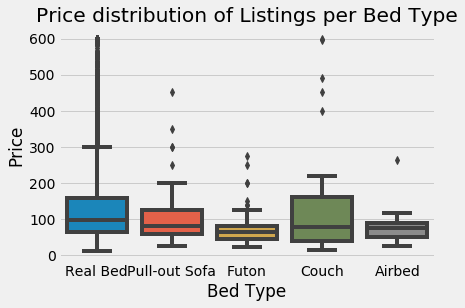

In [112]:
sns.boxplot(x=dataprices['bed_type'],y = dataprices['price'])
plt.xlabel('Bed Type')
plt.ylabel('Price')
plt.title('Price distribution of Listings per Bed Type')
plt.savefig('Price_distribution_of_Listings_per_Bed_Type.png')

Getting a Real Bed would appear to be costlier than any other options available whereas looking for an airbed has the cheapest prices available. 

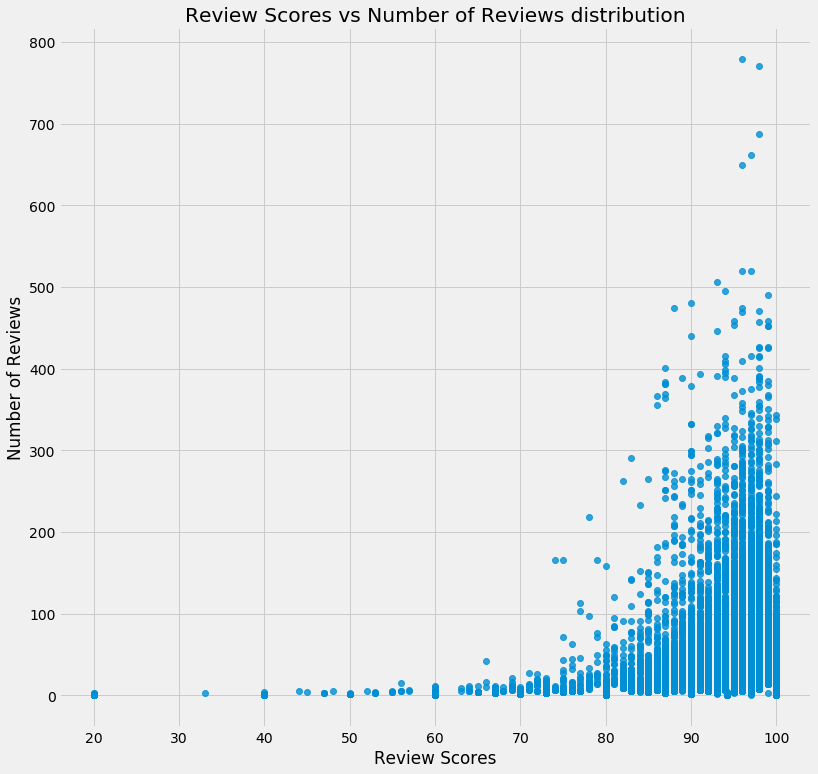

In [113]:
fig_dims = (12,12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(y= dataprices['number_of_reviews'],x = dataprices['review_scores_rating'], fit_reg=False)
plt.xlabel('Review Scores')
plt.ylabel('Number of Reviews')
plt.title('Review Scores vs Number of Reviews distribution')
plt.savefig('Review_Scores_vs_Number_of_Reviews_distribution.png')

From the above plot, we can note that the more review score a Listing has, the more amount of reviews it has or vice versa. It almost seems logical that Listings with low review score would have low number of ratings as we can see by the few low ratings on the graph. It is also interesting to note that the highest ratings are centered around 80  to 100 score and the number of reviews are centered between 0 to 200

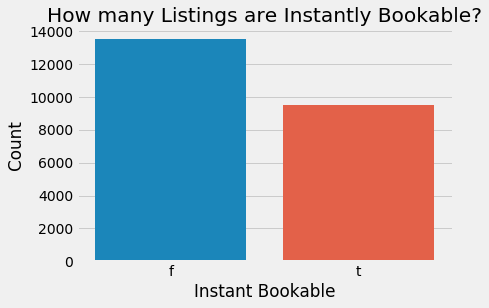

In [114]:
sns.countplot(x = dataprices['instant_bookable'])
plt.xlabel('Instant Bookable')
plt.ylabel('Count')
plt.title('How many Listings are Instantly Bookable?')
plt.savefig('How_many_Listings_are_Instantly_Bookable.png')

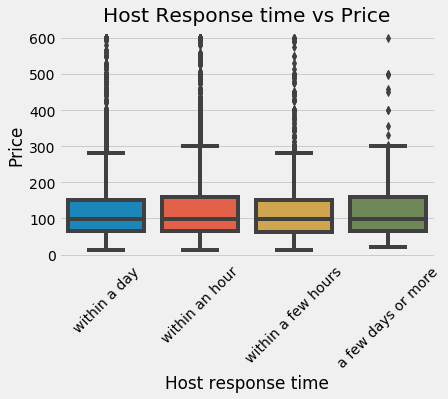

In [115]:
sns.boxplot(x = dataprices['host_response_time'], y = dataprices['price'])
plt.xlabel('Host response time')
plt.ylabel('Price')
plt.title('Host Response time vs Price')
plt.xticks(rotation = 45)
plt.savefig('Host_Response_time_vs_Price.png')

It is interesting to note that the response time of a host has little to no effect on the prices of the Listings. 

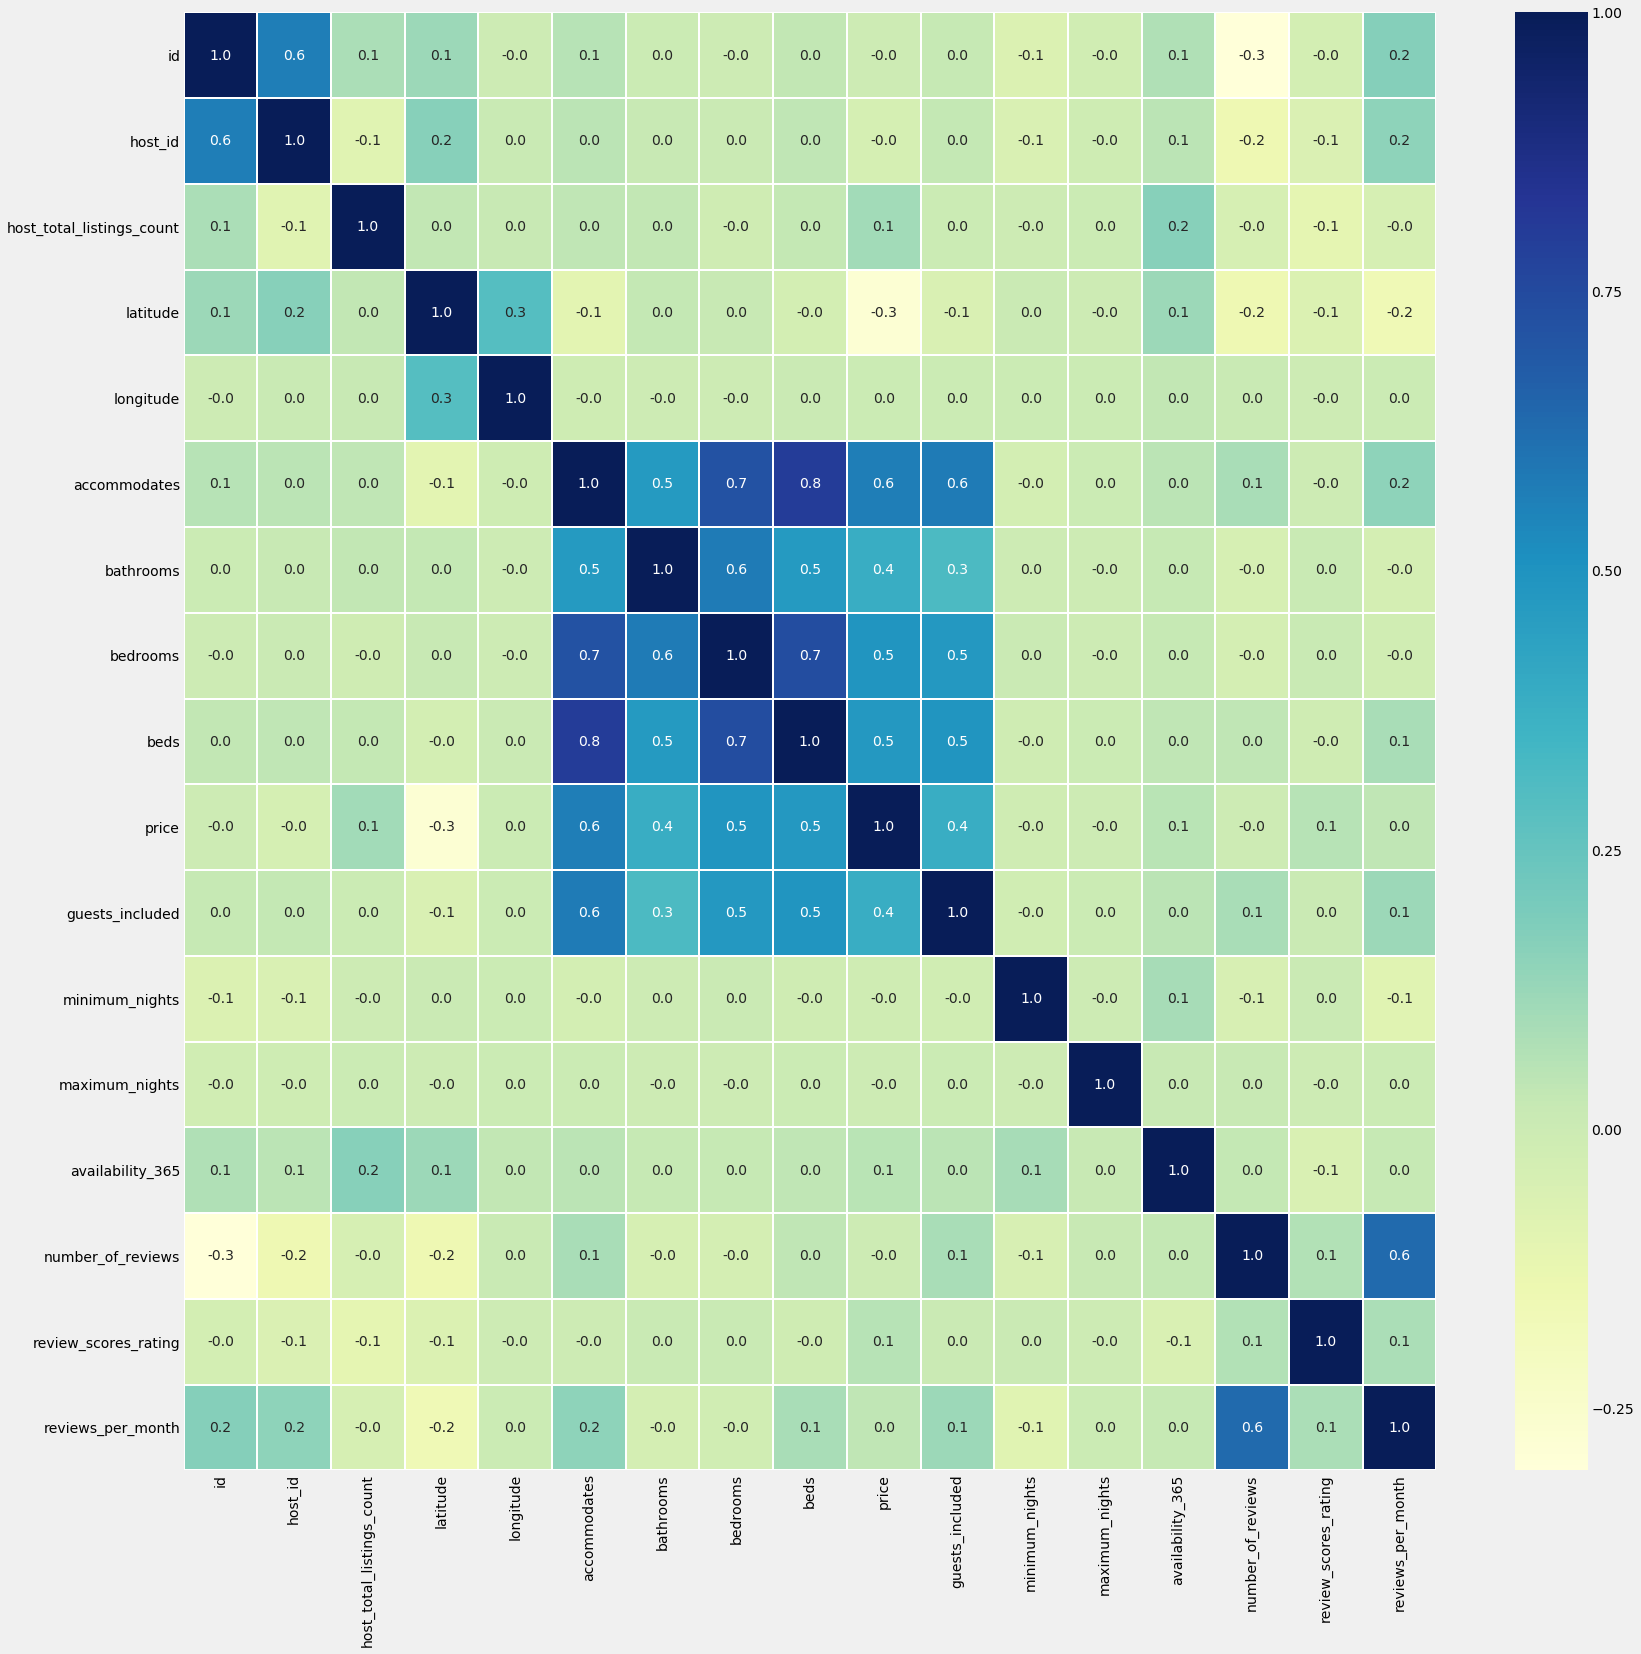

In [145]:
f, ax = plt.subplots(figsize=(25,25))
sns_plot = sns.heatmap(dataprices.corr(), annot = True, linewidths = 1, fmt = '.1f', ax=ax, cmap="YlGnBu")
plt.show()
figure = sns_plot.get_figure()    
figure.savefig('Heatmap.png')

For the end of our EDA, we make a Heatmap to find which variables are positively correlated and which ones are negatively correlated. A positive correlation is much more informative than a negative one. 

## Modeling Price

First, we will do one hot encoding to get dummies for our categorical variables. Doing this will ensure that we can also count on them to be a factor in predicting the Listing Prices.

In [117]:
data2 = pd.get_dummies(dataprices, columns = ['host_response_time','host_is_superhost','neighbourhood','property_type','room_type','bed_type','instant_bookable'])

### Linear Regression

For regression, the general prediction formula for a linear model looks as follows:

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

Here, x[0] to x[p] denotes the features (in this example, the number of features is p+1) of a single data point, w and b are parameters of the model that are learned, and ŷ is the prediction the model makes. 

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values, divided by the number of samples. Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity.

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = data2['price']
x = data2.drop('price', axis =1)

# split the dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [119]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.53
Test set score: 0.53


Here, with Linear regression, we get a score of 0.53 for both the training and test set, we can see that it is because the model did not generalize very well to the data that we have. It cannot be determined if the model overfit or underfit to the data as the training and test scores are the same. All we can say for sure is that the model is insufficient. Nevertheless, it makes sense to try out Lasso and Ridge regression in order to test the complexity of the model


Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well.

In [120]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.52
Test set score: 0.53


C:\Users\krish\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.323805e-21
  overwrite_a=True).T


Ridge is a more restricted model, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization. The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the alpha parameter. In the previous code, we used the default alpha = 1.0. There is no reason why this will give us the best trade-off, though. The optimum setting of alpha depends on the particular dataset we are using. Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization. 

In [121]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.52
Test set score: 0.53


C:\Users\krish\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.350814e-20
  overwrite_a=True).T


In [122]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.53
Test set score: 0.53


C:\Users\krish\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.478106e-22
  overwrite_a=True).T


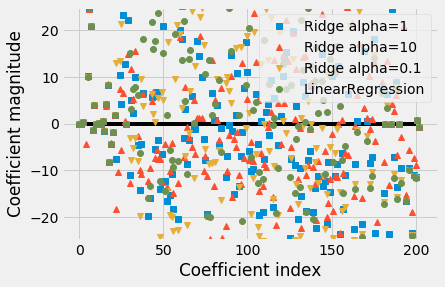

In [138]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.savefig('Ridge_graph.png')

Even after all these attempts at training the model with different alpha coefficients, we donot see an improvement with the score. 

We can try another regularization technique which is Lasso regression.


An alternative to Ridge for regularizing linear regression is Lasso. As with ridge regression, the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization. The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

In [124]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.48
Test set score: 0.48
Number of features used: 18


Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls how strongly coefficients are pushed toward zero. In the previous code, we used the default of alpha=1.0. To reduce underfitting, let’s try decreasing alpha. When we do this, we also need to increase the default setting of max_iter (the maximum number of iterations to run)

In [125]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.52
Test set score: 0.53
Number of features used: 152


In [126]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.53
Test set score: 0.53
Number of features used: 192


A lower alpha allowed us to fit a more complex model, which worked better on the training and test data.

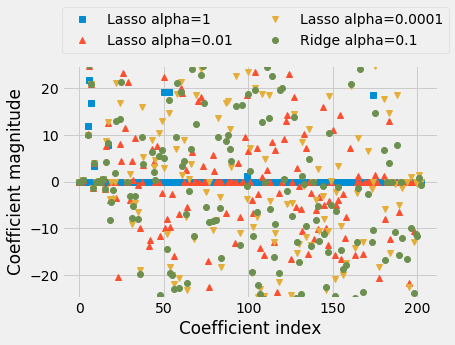

In [139]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.savefig('Lasso_graph.png')

It seems that even after using the regularization methods on the data, the score doesn't improve much. Moving on to try different models

### Random Forest

 A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. This reduction in overfitting, while retaining the predictive power of the trees, can be shown using rigorous mathematics. To implement this strategy, we need to build many decision trees. Each tree should do an acceptable job of predicting the target, and should also be different from the other trees. Random forests get their name from injecting randomness into the tree building to ensure each tree is different. 

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 58.769
R^2 test: 0.589


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=1, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 84.975
R^2 test: 0.141


In [130]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [131]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [500, 666, 833, 1000, 1166, 1333, 1500, 1666, 1833, 2000]}


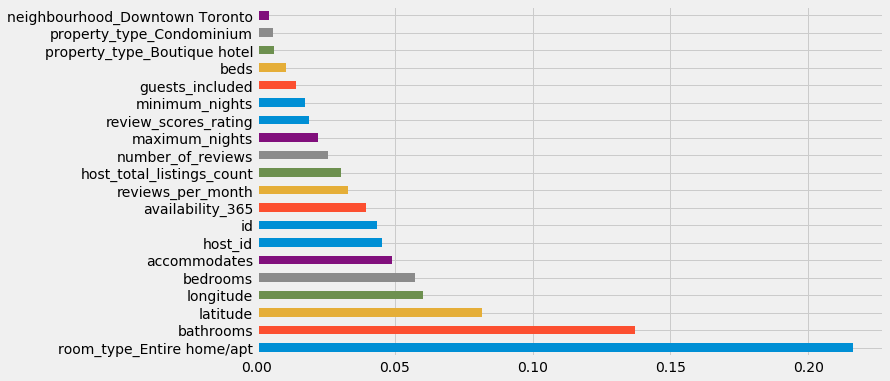

In [140]:
feat_imp = pd.Series(rf.feature_importances_, index=x.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))
plt.savefig('RandomForest_FeatureImportance.png')

With the random forest model, we can see that the most importance is placed on the feature of whether the room type is an entire home/apt or not followed by the bathroom feature. 

### Gradient Boosted Regression Tree

The gradient boosted regression tree is another ensemble method that combines multiple decision trees to create a more powerful model. In contrast to the random forest approach, gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one. By default, there is no randomization in gradient boosted regression trees; instead, strong pre-pruning is used. Gradient boosted trees often use very shallow trees, of depth one to five, which makes the model smaller in terms of memory and makes predictions faster. The main idea behind gradient boosting is to combine many simple models (in this context known as weak learners), like shallow trees. Each tree can only provide good predictions on part of the data, and so more and more trees are added to iteratively improve performance.

In [132]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.597
Accuracy on test set: 0.575


In [52]:
gbrt = GradientBoostingRegressor(random_state=0, max_depth=10)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))
#Massively overfitting

Accuracy on training set: 0.930
Accuracy on test set: 0.594


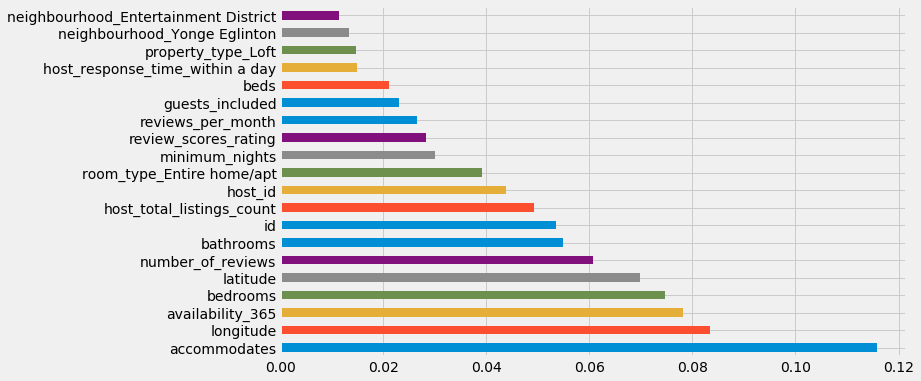

In [141]:
feat_imp = pd.Series(gbrt.feature_importances_, index=x.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))
plt.savefig('GBRT_FeatureImportance.png')

With the gradient boosted regression tree, we see that the best accuracy that we get is close to 60% and the features with the most importance are id, latitude and host_id. 

## Conclusion

Using the data from the insideairbnb site, I tried my best to perform satisfactory Exploratory Data analysis and model the Listing prices. There are several other methods that we can apply to improve our model accuracy and predict better. However, with my current limitations, we predict the Listing prices in Toronto with 3 different predictive models which are Linear Regression, Random Forest and Gradient Boosted Regression Tree. 

## Citations

https://www.theguardian.com/technology/2019/may/05/airbnb-homelessness-renting-housing-accommodation-social-policy-cities-travel-leisure

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/

https://python-graph-gallery.com/

https://seaborn.pydata.org/

http://insideairbnb.com/

https://en.wikipedia.org/wiki/Random_forest

https://en.wikipedia.org/wiki/Linear_regression

https://en.wikipedia.org/wiki/Tikhonov_regularization

https://en.wikipedia.org/wiki/Lasso_(statistics)


## License

Copyright 2020 Krisha Shah

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.